In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
from pyod.utils.data import evaluate_print
import matplotlib.pyplot as plt

tabelafinal = pd.DataFrame(columns=['algoritmo','contaminacao','acuracia','precisao','recall','f1','fn','fp','tp'])
print(tabelafinal)
 
def avalia(clf_name,Y,y_train_scores,y_train_pred):
    # Avalia e imprime os resultados
    print("Avaliação do modelo "+clf_name+":")
    evaluate_print(clf_name, Y, y_train_scores)
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    print('Acurácia='+str(accuracy_score(Y,y_train_pred)*100))   
    print('Precisão='+str(precision_score(Y,y_train_pred)*100))
    print('Recall='+str(recall_score(Y,y_train_pred)*100))
    print('Falso Positivo='+str(fp))
    print('Falso Negativo='+str(fn))
    print('F1-score='+str(f1_score(Y,y_train_pred)*100))
    print('ROC='+str(roc_auc_score(Y,y_train_scores)))

def gera_matriz_de_confusao(Y,y_train_pred,clf_name):
    cm = confusion_matrix(Y,y_train_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Anomalia'])
    disp.plot(cmap=plt.cm.Blues)
    disp.ax_.set(title='Matriz de Confusão do '+clf_name,xlabel='Valores preditos', ylabel='Valores reais')
    plt.show()
    
def grava_avaliacao(clf_name,Y,y_train_scores,y_train_pred,contamination):
    # Grava os resultados da avaliação na tabela final
    tn, fp, fn, tp = confusion_matrix(Y,y_train_pred).ravel()
    ac=("{:.2f}".format(round(accuracy_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Acurácia='+ac)   
    pc=("{:.2f}".format(round(precision_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Precisão='+pc)
    rc=("{:.2f}".format(round(recall_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('Recall='+rc)
    f1=("{:.2f}".format(round(f1_score(Y,y_train_pred)*100,2))).replace(".", ",")
    print('F1='+f1)
    print('Falso Negativo='+str(fn))
    print('Falso Positivo='+str(fp))
    print('Verdadeiro Positivo='+str(tp))
    cont=str(round(contamination,2)).replace(".",",")
    tabelafinal.loc[len(tabelafinal.index)] = [clf_name,cont,ac,pc,rc,f1,fn,fp,tp] 
      

Empty DataFrame
Columns: [algoritmo, contaminacao, acuracia, precisao, recall, f1, fn, fp, tp]
Index: []


# Recuperação dos dados a serem utilizados na avaliação
Leitura do arquivo gerado para o material de catmat_id= 445485 -> Descrição:'ÁGUA MINERAL NATURAL, TIPO SEM GÁS MATERIAL EMBALAGEM PLÁSTICO TIPO EMBALAGEM RETORNÁVEL'.

In [2]:
import os
import pandas as pd
def load_itens(path):
    csv_path = os.path.join(path,"445485.csv")
    return pd.read_csv(csv_path)

df=load_itens(".")
## Retira os campos que não serão utilizados no treinamento
df = df.drop(['licitacao_contrato'],axis=1)
df = df.drop(['id'],axis=1)
df = df.drop(['data'],axis=1)
df = df.drop(['catmat_id'],axis=1)
df = df.drop(['unidade'],axis=1)
df = df.drop(['valor_total'],axis=1)
df = df.drop(['municipio_uasg'],axis=1)
df = df.drop(['municipio_fornecedor'],axis=1)
print(df)

     quantidade  valor_unitario  distancia_uasg_fornecedor  anomalia
0           420           12.00                    935.371         0
1         28000            5.88                      0.000         0
2          2100            5.09                      0.000         0
3           360            7.70                    172.788         0
4           120            7.70                    172.788         0
..          ...             ...                        ...       ...
725        5000           10.45                    398.772         0
726        4000           13.45                    398.772         0
727        1440           11.37                      0.000         0
728        1440           10.58                      0.000         0
729          10           20.00                      0.000         0

[730 rows x 4 columns]


# Separação do Label dos dados

In [3]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
print(X)
print(Y)

     quantidade  valor_unitario  distancia_uasg_fornecedor
0           420           12.00                    935.371
1         28000            5.88                      0.000
2          2100            5.09                      0.000
3           360            7.70                    172.788
4           120            7.70                    172.788
..          ...             ...                        ...
725        5000           10.45                    398.772
726        4000           13.45                    398.772
727        1440           11.37                      0.000
728        1440           10.58                      0.000
729          10           20.00                      0.000

[730 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Name: anomalia, Length: 730, dtype: int64


# Pré-processamento normalização dos dados min-max e robust

In [4]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import numpy as np

# Cria uma instância do RobustScaler
robust_scaler = RobustScaler()

# Ajusta e transforma os dados com o RobustScaler
X_robust = robust_scaler.fit_transform(X)

# Cria uma instância do MinMaxScaler
minmax_scaler = MinMaxScaler()

# Ajusta e transforma os dados com o MinMaxScaler
X_minmax = minmax_scaler.fit_transform(X_robust)

# Agora X_minmax está na escala robusta e depois na escala min-max
print(X_minmax)

[[1.29194197e-03 1.14586831e-05 3.51124466e-01]
 [8.61294649e-02 5.59520980e-06 0.00000000e+00]
 [6.45970987e-03 4.83832354e-06 0.00000000e+00]
 ...
 [4.42951534e-03 1.08550902e-05 0.00000000e+00]
 [4.42951534e-03 1.00982040e-05 0.00000000e+00]
 [3.07605232e-05 1.91233540e-05 0.00000000e+00]]


## Teste de cada um dos algoritmos não supervisionados

# CBLOF

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
 

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
 

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default valu

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default valu

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default valu

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default valu

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default valu

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default valu

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default valu

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Best Score:  0.6166666666666666
Best Params:  {'contamination': 0.15, 'random_state': 69}


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Avaliação do modelo CBLOF:
CBLOF ROC:0.8888, precision @ rank n:0.2857
Acurácia=86.02739726027397
Precisão=12.844036697247708
Recall=66.66666666666666
Falso Positivo=95
Falso Negativo=7
F1-score=21.538461538461537
ROC=0.8888441131036335


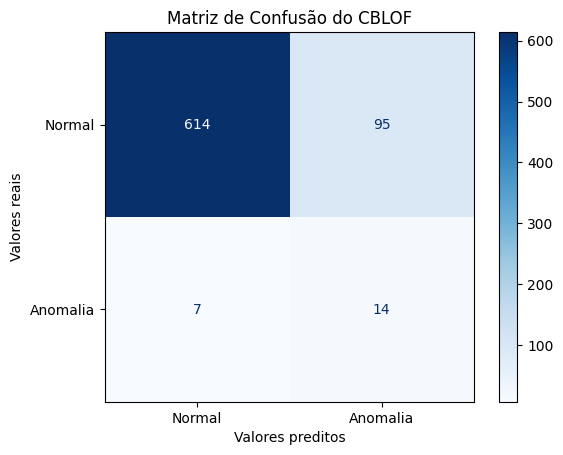

Acurácia=86,03
Precisão=12,84
Recall=66,67
F1=21,54
Falso Negativo=7
Falso Positivo=95
Verdadeiro Positivo=14


In [5]:
## class pyod.models.cblof.CBLOF(n_clusters=8, contamination=0.1, clustering_estimator=None, alpha=0.9, beta=5, 
# use_weights=False, check_estimator=False, random_state=None, n_jobs=1)

from pyod.models.cblof import CBLOF
from sklearn.model_selection import GridSearchCV

# Uso do constructor para criar um classifier.
clf = CBLOF()
clf_name='CBLOF'

parametros = {'contamination': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15],
             'random_state':[69]}

grid = GridSearchCV(estimator = clf,          
                param_grid = parametros,  
                scoring = 'recall',           
                cv = 10)  

grid_result = grid.fit(X_minmax, Y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

contamination=grid_result.best_params_['contamination']

funcao=clf_name+'(**grid.best_params_)'
clf = eval(funcao)
clf.fit(X_minmax)

avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

# COF

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\skle

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\bas

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encoun

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnin

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnin

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: Us

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warni

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnin

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x,

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warni

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnin

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x,

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warni

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnin

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: Us

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warni

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\bas

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnin

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x,

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y 

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnin

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x,

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered i

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnin

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: Us

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warni

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnin

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x,

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neig

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\bas

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnin

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: Us

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to con

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: invalid value encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  cof_.append((ac_dist[_g] * self.n_neighbors_) /
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  war

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: invalid value encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\cof.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  cof_[_g] = (ac_dist[_g] * self.n_neighbors_) / np.sum(ac_dist[sbn_path_index[_g]])
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\numpy\core\_methods.py:213: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnin

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\bas

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Best Score:  0.7
Best Params:  {'contamination': 0.14, 'method': 'fast', 'n_neighbors': 30}
Avaliação do modelo COF:
COF ROC:0.9639, precision @ rank n:0.5238
Acurácia=88.9041095890411
Precisão=19.387755102040817
Recall=90.47619047619048
Falso Positivo=79
Falso Negativo=2
F1-score=31.9327731092437
ROC=0.9639331049768286


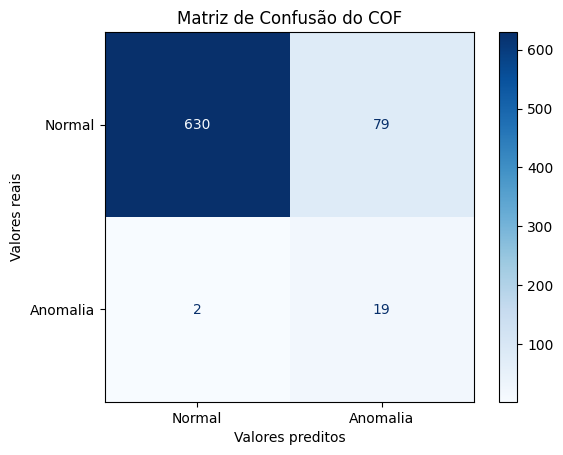

Acurácia=88,90
Precisão=19,39
Recall=90,48
F1=31,93
Falso Negativo=2
Falso Positivo=79
Verdadeiro Positivo=19


In [6]:
## class pyod.models.cof.COF(contamination=0.1, n_neighbors=20, method='fast')
#Parameters
#contamination float in (0., 0.5), optional (default=0.1)
# The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.
# n_neighborsint, optional (default=20)
# Number of neighbors to use by default for k neighbors queries. Note that n_neighbors should be less than the number of samples. If n_neighbors is larger than the number of samples provided, all samples will be used.
# method string, optional (default=’fast’)
#Valid values for method are:
# ‘fast’ Fast COF, computes the full pairwise distance matrix up front.
# ‘memory’ Memory-efficient COF, computes pairwise distances only when needed at the cost of computational speed

from pyod.models.cof import COF
from sklearn.model_selection import GridSearchCV

# Uso do constructor para criar um classifier.
clf = COF()
clf_name='COF'

parametros = {'contamination': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15],
              'n_neighbors':[5, 10, 15, 20, 25, 30],
              'method':['fast','memory']}

grid = GridSearchCV(estimator = clf,          
                param_grid = parametros,  
                scoring = 'recall',           
                cv = 10)  

grid_result = grid.fit(X_minmax, Y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

contamination=grid_result.best_params_['contamination']

funcao=clf_name+'(**grid.best_params_)'
clf = eval(funcao)
clf.fit(X_minmax)

avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

# CD

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\bas

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division`

Best Score:  0.8
Best Params:  {'contamination': 0.05}
Avaliação do modelo CD:
CD ROC:0.9111, precision @ rank n:0.3333
Acurácia=95.8904109589041
Precisão=35.483870967741936
Recall=52.38095238095239
Falso Positivo=20
Falso Negativo=10
F1-score=42.30769230769231
ROC=0.9110752904829068


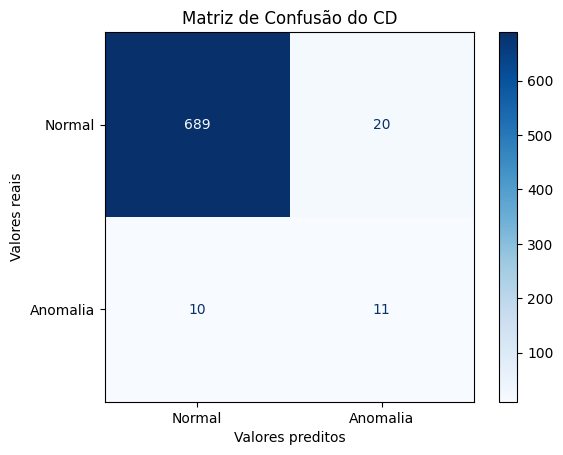

Acurácia=95,89
Precisão=35,48
Recall=52,38
F1=42,31
Falso Negativo=10
Falso Positivo=20
Verdadeiro Positivo=11


In [7]:
## class pyod.models.cd.CD(contamination=0.1, model=LinearRegression())
# Parameters
# contamination float in (0., 0.5), optional (default=0.1)
# The amount of contamination of the data set, i.e. the proportion of outliers in the data set. 
# Used when fitting to define the threshold on the decision function.

# modelobject, optional (default=LinearRegression())
# Regression model used to calculate the Cook’s distance

from pyod.models.cd import CD
from sklearn.model_selection import GridSearchCV

# Uso do constructor para criar um classifier.
clf = CD()
clf_name='CD'

parametros = {'contamination': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]}

grid = GridSearchCV(estimator = clf,          
                param_grid = parametros,  
                scoring = 'recall',           
                cv = 10)  

grid_result = grid.fit(X_minmax, Y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

contamination=grid_result.best_params_['contamination']

funcao=clf_name+'(**grid.best_params_)'
clf = eval(funcao)
clf.fit(X_minmax)

avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

# COPOD

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    2.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parall

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: 

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarnin

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\envs\Mest

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mest

Best Score:  0.8
Best Params:  {'contamination': 0.12, 'n_jobs': -1}
Avaliação do modelo COPOD:
COPOD ROC:0.9774, precision @ rank n:0.5238
Acurácia=90.82191780821918
Precisão=23.863636363636363
Recall=100.0
Falso Positivo=67
Falso Negativo=0
F1-score=38.532110091743114
ROC=0.9774330042313117


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=

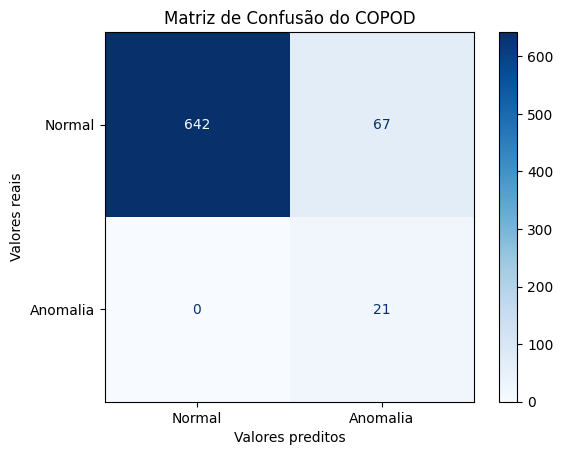

Acurácia=90,82
Precisão=23,86
Recall=100,00
F1=38,53
Falso Negativo=0
Falso Positivo=67
Verdadeiro Positivo=21


In [8]:
# class pyod.models.copod.COPOD(contamination=0.1, n_jobs=1)
## Parâmetros existentes:
# contamination float in (0., 0.5), optional (default=0.1)
# The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.

# n_jobs optional (default=1)
# The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.

from pyod.models.copod import COPOD

clf = COPOD()
clf_name='COPOD'

parametros = {'contamination': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15],
              'n_jobs':[-1]}

grid = GridSearchCV(estimator = clf,          
                param_grid = parametros,  
                scoring = 'recall',           
                cv = 10)  

grid_result = grid.fit(X_minmax, Y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

contamination=grid_result.best_params_['contamination']

funcao=clf_name+'(**grid.best_params_)'
clf = eval(funcao)
clf.fit(X_minmax)

avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

# DeepSVDD

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


21/21 [==============================] - 0s 1ms/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_1 (Dense)             (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 32)               0         
 bda)                                                            
                                                                 
 tf.math.pow_1 (TFOpLambda)  (None, 32)                0         
                                                                 
 tf.math.reduce_sum_1 (TFOpL  (None,)                  0         
 ambda

Epoch 78/100
19/19 - 0s - loss: 0.1251 - val_loss: 0.1079 - 37ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1238 - val_loss: 0.1078 - 41ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1245 - val_loss: 0.1078 - 34ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1238 - val_loss: 0.1076 - 52ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1257 - val_loss: 0.1076 - 46ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1234 - val_loss: 0.1041 - 33ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1198 - val_loss: 0.1025 - 54ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1206 - val_loss: 0.1024 - 42ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1200 - val_loss: 0.1020 - 45ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1199 - val_loss: 0.1017 - 37ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1193 - val_loss: 0.1014 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1198 - val_loss: 0.1015 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_3 (TFOpLam  (None, 32)               0         
 bda)                                                            
                                                                 
 tf.math.pow_3 (TFOpLambda)  (None, 32)                0         
                                                                 
 tf.math.reduce_sum_3 (TFOpL  (None,)                  0         
 ambda)                                                          
          

Epoch 79/100
19/19 - 0s - loss: 0.1571 - val_loss: 0.1814 - 42ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1578 - val_loss: 0.1813 - 43ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1583 - val_loss: 0.1813 - 41ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1576 - val_loss: 0.1812 - 40ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1571 - val_loss: 0.1813 - 36ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1586 - val_loss: 0.1813 - 49ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1589 - val_loss: 0.1812 - 48ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1577 - val_loss: 0.1814 - 39ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1577 - val_loss: 0.1813 - 26ms/epoch - 1ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1570 - val_loss: 0.1812 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1578 - val_loss: 0.1813 - 51ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1580 - val_loss: 0.1813 - 36ms/epoch - 2ms/step
Epoch 91/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


 Lambda)                                                         
                                                                 
 tf.__operators__.add_5 (TFO  ()                       0         
 pLambda)                                                        
                                                                 
 add_loss_5 (AddLoss)        ()                        0         
                                                                 
Total params: 2,240
Trainable params: 2,240
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
19/19 - 0s - loss: 0.2215 - val_loss: 0.2080 - 409ms/epoch - 22ms/step
Epoch 2/100
19/19 - 0s - loss: 0.2034 - val_loss: 0.1958 - 50ms/epoch - 3ms/step
Epoch 3/100
19/19 - 0s - loss: 0.1967 - val_loss: 0.1920 - 42ms/epoch - 2ms/step
Epoch 4/100
19/19 - 0s - loss: 0.1907 - val_loss: 0.1837 - 49ms/epoch - 3ms/step
Epoch 5/100
19/19 - 0s - loss: 0.1824 - val_loss: 0.1769 - 53ms/epoch - 3

Epoch 93/100
19/19 - 0s - loss: 0.1262 - val_loss: 0.1248 - 54ms/epoch - 3ms/step
Epoch 94/100
19/19 - 0s - loss: 0.1238 - val_loss: 0.1262 - 34ms/epoch - 2ms/step
Epoch 95/100
19/19 - 0s - loss: 0.1232 - val_loss: 0.1254 - 43ms/epoch - 2ms/step
Epoch 96/100
19/19 - 0s - loss: 0.1233 - val_loss: 0.1253 - 49ms/epoch - 3ms/step
Epoch 97/100
19/19 - 0s - loss: 0.1228 - val_loss: 0.1253 - 47ms/epoch - 2ms/step
Epoch 98/100
19/19 - 0s - loss: 0.1217 - val_loss: 0.1256 - 52ms/epoch - 3ms/step
Epoch 99/100
19/19 - 0s - loss: 0.1234 - val_loss: 0.1250 - 43ms/epoch - 2ms/step
Epoch 100/100
19/19 - 0s - loss: 0.1224 - val_loss: 0.1255 - 39ms/epoch - 2ms/step
21/21 [==============================] - 0s 948us/step
Model: "model_11"


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_7 (Dense)             (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_7 (TFOpLam  (None, 32)               0         
 bda)                                                            
                                                                 
 tf.math.pow_7 (TFOpLambda)  (None, 32)                0         
                                                                 
 tf.math.reduce_sum_7 (TFOpL  (None,)                  0         
 ambda)                                                          
          

Epoch 79/100
19/19 - 0s - loss: 0.1376 - val_loss: 0.1206 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1383 - val_loss: 0.1205 - 50ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1379 - val_loss: 0.1203 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1384 - val_loss: 0.1203 - 49ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1382 - val_loss: 0.1200 - 42ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1383 - val_loss: 0.1200 - 50ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1383 - val_loss: 0.1200 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1378 - val_loss: 0.1198 - 50ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1377 - val_loss: 0.1198 - 44ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1373 - val_loss: 0.1198 - 41ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1364 - val_loss: 0.1195 - 43ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1378 - val_loss: 0.1200 - 47ms/epoch - 2ms/step
Epoch 91/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_9 (Dense)             (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_9 (TFOpLam  (None, 32)               0         
 bda)                                                            
                                                                 
 tf.math.pow_9 (TFOpLambda)  (None, 32)                0         
                                                                 
 tf.math.reduce_sum_9 (TFOpL  (None,)                  0         
 ambda)                                                   

19/19 - 0s - loss: 0.1215 - val_loss: 0.5495 - 35ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1211 - val_loss: 0.5342 - 54ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1212 - val_loss: 0.5450 - 42ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1225 - val_loss: 0.5382 - 40ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1215 - val_loss: 0.5469 - 43ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1218 - val_loss: 0.5462 - 40ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1200 - val_loss: 0.5436 - 38ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1212 - val_loss: 0.5429 - 34ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1227 - val_loss: 0.5423 - 50ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1221 - val_loss: 0.5462 - 33ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1216 - val_loss: 0.5507 - 64ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1224 - val_loss: 0.5605 - 33ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_11 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_11 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_11 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_11 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1462 - val_loss: 0.1254 - 44ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1472 - val_loss: 0.1253 - 45ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1468 - val_loss: 0.1255 - 42ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1471 - val_loss: 0.1250 - 46ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1470 - val_loss: 0.1250 - 44ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1484 - val_loss: 0.1255 - 44ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1484 - val_loss: 0.1251 - 41ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1483 - val_loss: 0.1253 - 45ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1471 - val_loss: 0.1252 - 45ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1471 - val_loss: 0.1255 - 50ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1482 - val_loss: 0.1249 - 50ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1475 - val_loss: 0.1250 - 51ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


                                                                 
 tf.math.reduce_sum_13 (TFOp  (None,)                  0         
 Lambda)                                                         
                                                                 
 tf.math.reduce_mean_13 (TFO  ()                       0         
 pLambda)                                                        
                                                                 
 tf.__operators__.add_13 (TF  ()                       0         
 OpLambda)                                                       
                                                                 
 add_loss_13 (AddLoss)       ()                        0         
                                                                 
Total params: 2,240
Trainable params: 2,240
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
19/19 - 0s - loss: 0.2251 - val_loss: 0.2295 - 380ms/epoc

Epoch 89/100
19/19 - 0s - loss: 0.1351 - val_loss: 0.1714 - 46ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1372 - val_loss: 0.1721 - 41ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1361 - val_loss: 0.1719 - 45ms/epoch - 2ms/step
Epoch 92/100
19/19 - 0s - loss: 0.1371 - val_loss: 0.1716 - 37ms/epoch - 2ms/step
Epoch 93/100
19/19 - 0s - loss: 0.1363 - val_loss: 0.1715 - 50ms/epoch - 3ms/step
Epoch 94/100
19/19 - 0s - loss: 0.1365 - val_loss: 0.1717 - 47ms/epoch - 2ms/step
Epoch 95/100
19/19 - 0s - loss: 0.1357 - val_loss: 0.1713 - 33ms/epoch - 2ms/step
Epoch 96/100
19/19 - 0s - loss: 0.1359 - val_loss: 0.1716 - 50ms/epoch - 3ms/step
Epoch 97/100
19/19 - 0s - loss: 0.1363 - val_loss: 0.1713 - 45ms/epoch - 2ms/step
Epoch 98/100
19/19 - 0s - loss: 0.1365 - val_loss: 0.1712 - 42ms/epoch - 2ms/step
Epoch 99/100
19/19 - 0s - loss: 0.1363 - val_loss: 0.1712 - 41ms/epoch - 2ms/step
Epoch 100/100
19/19 - 0s - loss: 0.1364 - val_loss: 0.1713 - 43ms/epoch - 2ms/step
21/21 [========

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_15 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_15 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_15 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_15 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1791 - val_loss: 0.1837 - 60ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1786 - val_loss: 0.1845 - 52ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1782 - val_loss: 0.1837 - 59ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1805 - val_loss: 0.1837 - 53ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1799 - val_loss: 0.1839 - 46ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1794 - val_loss: 0.1845 - 50ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1785 - val_loss: 0.1845 - 48ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1796 - val_loss: 0.1841 - 46ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1787 - val_loss: 0.1838 - 45ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1801 - val_loss: 0.1834 - 45ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1787 - val_loss: 0.1840 - 53ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1800 - val_loss: 0.1835 - 52ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_17 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_17 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_17 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_17 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1549 - val_loss: 0.1627 - 50ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1551 - val_loss: 0.1611 - 52ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1533 - val_loss: 0.1584 - 61ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1530 - val_loss: 0.1574 - 51ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1544 - val_loss: 0.1564 - 48ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1542 - val_loss: 0.1558 - 38ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1537 - val_loss: 0.1512 - 50ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1543 - val_loss: 0.1502 - 33ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1539 - val_loss: 0.1493 - 50ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1551 - val_loss: 0.1436 - 50ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1535 - val_loss: 0.1437 - 51ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1546 - val_loss: 0.1466 - 44ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_19 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_19 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_19 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_19 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1513 - val_loss: 0.1594 - 35ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1503 - val_loss: 0.1594 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1516 - val_loss: 0.1593 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1532 - val_loss: 0.1594 - 31ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1520 - val_loss: 0.1596 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1506 - val_loss: 0.1595 - 31ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1525 - val_loss: 0.1596 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1518 - val_loss: 0.1596 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1515 - val_loss: 0.1593 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1518 - val_loss: 0.1594 - 32ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1509 - val_loss: 0.1592 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1513 - val_loss: 0.1593 - 47ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


                                                                 
 dense_21 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_21 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_21 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_21 (TFOp  (None,)                  0         
 Lambda)                                                         
                                                                 
 tf.math.reduce_mean_21 (TFO  ()                       0         
 pLambda)                                                        
          

Epoch 82/100
19/19 - 0s - loss: 0.1515 - val_loss: 0.6151 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1530 - val_loss: 0.6033 - 57ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1559 - val_loss: 0.6224 - 48ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1524 - val_loss: 0.5659 - 46ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1522 - val_loss: 0.5692 - 41ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1528 - val_loss: 0.5560 - 41ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1512 - val_loss: 0.5486 - 42ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1511 - val_loss: 0.5698 - 39ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1533 - val_loss: 0.5620 - 43ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1535 - val_loss: 0.5571 - 42ms/epoch - 2ms/step
Epoch 92/100
19/19 - 0s - loss: 0.1519 - val_loss: 0.5749 - 42ms/epoch - 2ms/step
Epoch 93/100
19/19 - 0s - loss: 0.1511 - val_loss: 0.5441 - 38ms/epoch - 2ms/step
Epoch 94/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_23 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_23 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_23 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_23 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1425 - val_loss: 0.1644 - 49ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1399 - val_loss: 0.1643 - 46ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1411 - val_loss: 0.1641 - 44ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1409 - val_loss: 0.1643 - 50ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1411 - val_loss: 0.1640 - 53ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1406 - val_loss: 0.1637 - 50ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1419 - val_loss: 0.1639 - 48ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1403 - val_loss: 0.1640 - 50ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1406 - val_loss: 0.1641 - 45ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1411 - val_loss: 0.1641 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1405 - val_loss: 0.1640 - 36ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1411 - val_loss: 0.1639 - 56ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_25 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_25 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_25 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_25 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1526 - val_loss: 0.1780 - 53ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1519 - val_loss: 0.1783 - 39ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1513 - val_loss: 0.1781 - 50ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1516 - val_loss: 0.1777 - 50ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1523 - val_loss: 0.1775 - 33ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1518 - val_loss: 0.1777 - 60ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1501 - val_loss: 0.1776 - 44ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1506 - val_loss: 0.1774 - 43ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1521 - val_loss: 0.1776 - 34ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1526 - val_loss: 0.1776 - 49ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1508 - val_loss: 0.1774 - 46ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1509 - val_loss: 0.1777 - 35ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_27 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_27 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_27 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_27 (TFOp  (None,)                  0         
 Lambda)                                                         
          

Epoch 79/100
19/19 - 0s - loss: 0.1394 - val_loss: 0.1439 - 33ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1388 - val_loss: 0.1433 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1388 - val_loss: 0.1435 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1402 - val_loss: 0.1432 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1397 - val_loss: 0.1433 - 32ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1396 - val_loss: 0.1431 - 31ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1380 - val_loss: 0.1436 - 49ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1390 - val_loss: 0.1429 - 45ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1390 - val_loss: 0.1439 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1390 - val_loss: 0.1428 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1403 - val_loss: 0.1431 - 54ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1380 - val_loss: 0.1429 - 45ms/epoch - 2ms/step
Epoch 91/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_29 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_29 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_29 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_29 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1105 - val_loss: 0.5015 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1095 - val_loss: 0.5146 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1101 - val_loss: 0.5163 - 48ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1101 - val_loss: 0.5013 - 31ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1093 - val_loss: 0.5022 - 62ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1097 - val_loss: 0.4947 - 32ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1095 - val_loss: 0.5159 - 48ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1105 - val_loss: 0.5159 - 48ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1097 - val_loss: 0.4987 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1095 - val_loss: 0.4982 - 48ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1091 - val_loss: 0.4955 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1094 - val_loss: 0.5136 - 47ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_31 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_31 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_31 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_31 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1824 - val_loss: 0.2047 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1837 - val_loss: 0.2042 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1819 - val_loss: 0.2043 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1825 - val_loss: 0.2041 - 32ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1820 - val_loss: 0.2042 - 48ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1822 - val_loss: 0.2041 - 34ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1824 - val_loss: 0.2036 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1834 - val_loss: 0.2034 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1817 - val_loss: 0.2037 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1827 - val_loss: 0.2037 - 48ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1814 - val_loss: 0.2036 - 30ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1835 - val_loss: 0.2038 - 31ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_33 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_33 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_33 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_33 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1595 - val_loss: 0.1560 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1608 - val_loss: 0.1563 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1603 - val_loss: 0.1558 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1591 - val_loss: 0.1555 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1596 - val_loss: 0.1560 - 51ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1602 - val_loss: 0.1553 - 39ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1604 - val_loss: 0.1557 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1605 - val_loss: 0.1555 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1608 - val_loss: 0.1559 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1591 - val_loss: 0.1551 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1596 - val_loss: 0.1559 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1600 - val_loss: 0.1552 - 47ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_35 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_35 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_35 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_35 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1700 - val_loss: 0.1566 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1704 - val_loss: 0.1556 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1699 - val_loss: 0.1565 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1701 - val_loss: 0.1509 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1696 - val_loss: 0.1612 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1685 - val_loss: 0.1502 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1690 - val_loss: 0.1572 - 54ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1702 - val_loss: 0.1530 - 36ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1703 - val_loss: 0.1580 - 55ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1698 - val_loss: 0.1531 - 31ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1701 - val_loss: 0.1526 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1695 - val_loss: 0.1525 - 63ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_38 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_37 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_37 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_37 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_37 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1264 - val_loss: 0.1315 - 49ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1271 - val_loss: 0.1319 - 41ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1265 - val_loss: 0.1315 - 63ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1263 - val_loss: 0.1313 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1262 - val_loss: 0.1316 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1271 - val_loss: 0.1313 - 32ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1260 - val_loss: 0.1313 - 41ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1261 - val_loss: 0.1312 - 38ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1267 - val_loss: 0.1311 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1263 - val_loss: 0.1313 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1267 - val_loss: 0.1311 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1261 - val_loss: 0.1310 - 61ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


21/21 [==============================] - 0s 801us/step
Model: "model_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_39 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_39 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_39 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_39 (TFOp  (None,)                  0         
 La

Epoch 78/100
19/19 - 0s - loss: 0.1326 - val_loss: 0.1693 - 54ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1342 - val_loss: 0.1707 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1338 - val_loss: 0.1706 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1325 - val_loss: 0.1693 - 63ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1321 - val_loss: 0.1704 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1339 - val_loss: 0.1697 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1327 - val_loss: 0.1705 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1322 - val_loss: 0.1694 - 48ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1330 - val_loss: 0.1701 - 36ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1329 - val_loss: 0.1704 - 43ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1335 - val_loss: 0.1713 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1322 - val_loss: 0.1710 - 49ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_41 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_41 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_41 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_41 (TFOp  (None,)                  0         
 Lambda)                                                         
          

Epoch 79/100
19/19 - 0s - loss: 0.1502 - val_loss: 0.1103 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1484 - val_loss: 0.1094 - 52ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1513 - val_loss: 0.1103 - 42ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1486 - val_loss: 0.1096 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1482 - val_loss: 0.1112 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1496 - val_loss: 0.1089 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1518 - val_loss: 0.1099 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1504 - val_loss: 0.1092 - 54ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1493 - val_loss: 0.1097 - 37ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1506 - val_loss: 0.1105 - 62ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1486 - val_loss: 0.1086 - 47ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1500 - val_loss: 0.1094 - 47ms/epoch - 2ms/step
Epoch 91/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


                                                                 
 dense_43 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_43 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_43 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_43 (TFOp  (None,)                  0         
 Lambda)                                                         
                                                                 
 tf.math.reduce_mean_43 (TFO  ()                       0         
 pLambda)                                                        
          

Epoch 82/100
19/19 - 0s - loss: 0.1392 - val_loss: 0.2402 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1404 - val_loss: 0.2429 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1399 - val_loss: 0.2348 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1405 - val_loss: 0.2425 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1395 - val_loss: 0.2319 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1404 - val_loss: 0.2346 - 63ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1398 - val_loss: 0.2317 - 32ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1414 - val_loss: 0.2315 - 47ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1406 - val_loss: 0.2319 - 47ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1406 - val_loss: 0.2203 - 47ms/epoch - 2ms/step
Epoch 92/100
19/19 - 0s - loss: 0.1400 - val_loss: 0.2214 - 47ms/epoch - 2ms/step
Epoch 93/100
19/19 - 0s - loss: 0.1404 - val_loss: 0.2170 - 47ms/epoch - 2ms/step
Epoch 94/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_45 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_45 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_45 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_45 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1235 - val_loss: 0.0829 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1239 - val_loss: 0.0829 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1237 - val_loss: 0.0828 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1227 - val_loss: 0.0829 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1235 - val_loss: 0.0828 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1234 - val_loss: 0.0834 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1231 - val_loss: 0.0827 - 63ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1258 - val_loss: 0.0825 - 63ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1244 - val_loss: 0.0832 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1223 - val_loss: 0.0828 - 63ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1235 - val_loss: 0.0828 - 63ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1223 - val_loss: 0.0830 - 47ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_48 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_47 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_47 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_47 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_47 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1559 - val_loss: 0.1459 - 44ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1528 - val_loss: 0.1459 - 44ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1534 - val_loss: 0.1454 - 34ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1531 - val_loss: 0.1444 - 39ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1533 - val_loss: 0.1472 - 60ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1528 - val_loss: 0.1436 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1532 - val_loss: 0.1446 - 58ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1537 - val_loss: 0.1443 - 53ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1535 - val_loss: 0.1435 - 52ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1535 - val_loss: 0.1453 - 37ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1530 - val_loss: 0.1456 - 38ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1526 - val_loss: 0.1438 - 48ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_50 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_49 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_49 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_49 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_49 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1403 - val_loss: 0.1398 - 42ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1392 - val_loss: 0.1396 - 57ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1407 - val_loss: 0.1395 - 41ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1395 - val_loss: 0.1393 - 50ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1388 - val_loss: 0.1395 - 51ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1390 - val_loss: 0.1394 - 64ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1385 - val_loss: 0.1394 - 49ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1403 - val_loss: 0.1392 - 50ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1399 - val_loss: 0.1392 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1410 - val_loss: 0.1391 - 44ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1403 - val_loss: 0.1392 - 51ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1397 - val_loss: 0.1391 - 49ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_52 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_51 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_51 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_51 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_51 (TFOp  (None,)                  0         
 Lambda)                                                         
          

Epoch 79/100
19/19 - 0s - loss: 0.1443 - val_loss: 0.1332 - 49ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1457 - val_loss: 0.1332 - 54ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1437 - val_loss: 0.1328 - 42ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1446 - val_loss: 0.1329 - 57ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1447 - val_loss: 0.1329 - 41ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1444 - val_loss: 0.1328 - 63ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1422 - val_loss: 0.1329 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1440 - val_loss: 0.1325 - 50ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1427 - val_loss: 0.1328 - 39ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1453 - val_loss: 0.1325 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1489 - val_loss: 0.1324 - 48ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1440 - val_loss: 0.1328 - 37ms/epoch - 2ms/step
Epoch 91/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_54 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_53 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_53 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_53 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_53 (TFOp  (None,)                  0         
 Lambda)                                                         
          

Epoch 79/100
19/19 - 0s - loss: 0.1630 - val_loss: 0.1305 - 55ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1629 - val_loss: 0.1310 - 50ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1642 - val_loss: 0.1305 - 42ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1632 - val_loss: 0.1317 - 42ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1623 - val_loss: 0.1305 - 42ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1635 - val_loss: 0.1305 - 50ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1642 - val_loss: 0.1305 - 33ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1635 - val_loss: 0.1306 - 32ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1634 - val_loss: 0.1305 - 32ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1632 - val_loss: 0.1302 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1641 - val_loss: 0.1303 - 54ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1634 - val_loss: 0.1304 - 42ms/epoch - 2ms/step
Epoch 91/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_56 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_55 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_55 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_55 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_55 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1654 - val_loss: 0.1843 - 57ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1654 - val_loss: 0.1844 - 48ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1655 - val_loss: 0.1844 - 41ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1642 - val_loss: 0.1843 - 43ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1648 - val_loss: 0.1846 - 40ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1642 - val_loss: 0.1841 - 50ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1659 - val_loss: 0.1844 - 52ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1650 - val_loss: 0.1841 - 63ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1658 - val_loss: 0.1845 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1643 - val_loss: 0.1841 - 48ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1648 - val_loss: 0.1841 - 38ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1651 - val_loss: 0.1841 - 55ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_58 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_57 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_57 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_57 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_57 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1357 - val_loss: 0.1725 - 50ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1349 - val_loss: 0.1721 - 51ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1358 - val_loss: 0.1719 - 50ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1352 - val_loss: 0.1720 - 42ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1347 - val_loss: 0.1720 - 37ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1353 - val_loss: 0.1720 - 53ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1353 - val_loss: 0.1719 - 29ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1350 - val_loss: 0.1719 - 51ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1360 - val_loss: 0.1714 - 40ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1351 - val_loss: 0.1720 - 44ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1351 - val_loss: 0.1719 - 50ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1348 - val_loss: 0.1716 - 48ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_60 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_59 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_59 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_59 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_59 (TFOp  (None,)                  0         
 Lambda)                                                  

19/19 - 0s - loss: 0.1307 - val_loss: 0.1370 - 33ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1314 - val_loss: 0.1370 - 53ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1308 - val_loss: 0.1371 - 32ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1318 - val_loss: 0.1370 - 35ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1301 - val_loss: 0.1371 - 50ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1310 - val_loss: 0.1371 - 33ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1311 - val_loss: 0.1370 - 49ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1318 - val_loss: 0.1371 - 51ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1314 - val_loss: 0.1370 - 49ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1295 - val_loss: 0.1371 - 56ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1307 - val_loss: 0.1368 - 43ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1307 - val_loss: 0.1369 - 42ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


None
Epoch 1/100
19/19 - 0s - loss: 0.2040 - val_loss: 0.1666 - 366ms/epoch - 19ms/step
Epoch 2/100
19/19 - 0s - loss: 0.1713 - val_loss: 0.1434 - 35ms/epoch - 2ms/step
Epoch 3/100
19/19 - 0s - loss: 0.1608 - val_loss: 0.1340 - 47ms/epoch - 2ms/step
Epoch 4/100
19/19 - 0s - loss: 0.1539 - val_loss: 0.1263 - 32ms/epoch - 2ms/step
Epoch 5/100
19/19 - 0s - loss: 0.1506 - val_loss: 0.1248 - 57ms/epoch - 3ms/step
Epoch 6/100
19/19 - 0s - loss: 0.1491 - val_loss: 0.1237 - 37ms/epoch - 2ms/step
Epoch 7/100
19/19 - 0s - loss: 0.1471 - val_loss: 0.1170 - 40ms/epoch - 2ms/step
Epoch 8/100
19/19 - 0s - loss: 0.1428 - val_loss: 0.1161 - 49ms/epoch - 3ms/step
Epoch 9/100
19/19 - 0s - loss: 0.1418 - val_loss: 0.1150 - 44ms/epoch - 2ms/step
Epoch 10/100
19/19 - 0s - loss: 0.1409 - val_loss: 0.1142 - 43ms/epoch - 2ms/step
Epoch 11/100
19/19 - 0s - loss: 0.1403 - val_loss: 0.1136 - 26ms/epoch - 1ms/step
Epoch 12/100
19/19 - 0s - loss: 0.1393 - val_loss: 0.1128 - 31ms/epoch - 2ms/step
Epoch 13/100
19/19

21/21 [==============================] - 0s 1ms/step
Model: "model_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_64 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_63 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


 tf.math.subtract_63 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_63 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_63 (TFOp  (None,)                  0         
 Lambda)                                                         
                                                                 
 tf.math.reduce_mean_63 (TFO  ()                       0         
 pLambda)                                                        
                                                                 
 tf.__operators__.add_63 (TF  ()                       0         
 OpLambda)                                                       
                                                                 
 add_loss_63 (AddLoss)       ()                        0         
          

Epoch 86/100
19/19 - 0s - loss: 0.1249 - val_loss: 0.1444 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1242 - val_loss: 0.1442 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1258 - val_loss: 0.1445 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1250 - val_loss: 0.1443 - 34ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1256 - val_loss: 0.1442 - 31ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1255 - val_loss: 0.1444 - 47ms/epoch - 2ms/step
Epoch 92/100
19/19 - 0s - loss: 0.1248 - val_loss: 0.1443 - 38ms/epoch - 2ms/step
Epoch 93/100
19/19 - 0s - loss: 0.1249 - val_loss: 0.1441 - 31ms/epoch - 2ms/step
Epoch 94/100
19/19 - 0s - loss: 0.1248 - val_loss: 0.1441 - 53ms/epoch - 3ms/step
Epoch 95/100
19/19 - 0s - loss: 0.1260 - val_loss: 0.1443 - 42ms/epoch - 2ms/step
Epoch 96/100
19/19 - 0s - loss: 0.1251 - val_loss: 0.1441 - 47ms/epoch - 2ms/step
Epoch 97/100
19/19 - 0s - loss: 0.1254 - val_loss: 0.1441 - 47ms/epoch - 2ms/step
Epoch 98/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


21/21 [==============================] - 0s 781us/step
Model: "model_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_66 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_65 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_65 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_65 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_65 (TFOp  (None,)                  0         
 La

Epoch 78/100
19/19 - 0s - loss: 0.1216 - val_loss: 0.5188 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1218 - val_loss: 0.5193 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1230 - val_loss: 0.5372 - 32ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1219 - val_loss: 0.5233 - 32ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1216 - val_loss: 0.5217 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1226 - val_loss: 0.5267 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1223 - val_loss: 0.5244 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1214 - val_loss: 0.5099 - 52ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1227 - val_loss: 0.5133 - 30ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1216 - val_loss: 0.5015 - 31ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1229 - val_loss: 0.5188 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1222 - val_loss: 0.5254 - 31ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


None
Epoch 1/100
19/19 - 0s - loss: 0.2635 - val_loss: 0.2680 - 347ms/epoch - 18ms/step
Epoch 2/100
19/19 - 0s - loss: 0.2460 - val_loss: 0.2635 - 35ms/epoch - 2ms/step
Epoch 3/100
19/19 - 0s - loss: 0.2404 - val_loss: 0.2632 - 32ms/epoch - 2ms/step
Epoch 4/100
19/19 - 0s - loss: 0.2325 - val_loss: 0.2624 - 47ms/epoch - 2ms/step
Epoch 5/100
19/19 - 0s - loss: 0.2235 - val_loss: 0.2646 - 38ms/epoch - 2ms/step
Epoch 6/100
19/19 - 0s - loss: 0.2140 - val_loss: 0.2649 - 47ms/epoch - 2ms/step
Epoch 7/100
19/19 - 0s - loss: 0.2098 - val_loss: 0.2688 - 31ms/epoch - 2ms/step
Epoch 8/100
19/19 - 0s - loss: 0.2065 - val_loss: 0.2714 - 47ms/epoch - 2ms/step
Epoch 9/100
19/19 - 0s - loss: 0.2043 - val_loss: 0.2782 - 37ms/epoch - 2ms/step
Epoch 10/100
19/19 - 0s - loss: 0.2039 - val_loss: 0.2822 - 49ms/epoch - 3ms/step
Epoch 11/100
19/19 - 0s - loss: 0.2024 - val_loss: 0.2921 - 39ms/epoch - 2ms/step
Epoch 12/100
19/19 - 0s - loss: 0.2005 - val_loss: 0.2956 - 47ms/epoch - 2ms/step
Epoch 13/100
19/19

21/21 [==============================] - 0s 376us/step
Model: "model_104"
_________________________________________________________________


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


 Layer (type)                Output Shape              Param #   
 input_70 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_69 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_69 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_69 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_69 (TFOp  (None,)                  0         
 Lambda)                                                         
                                                                 
 tf.math.r

Epoch 80/100
19/19 - 0s - loss: 0.1325 - val_loss: 0.1711 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1325 - val_loss: 0.1706 - 32ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1326 - val_loss: 0.1716 - 31ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1325 - val_loss: 0.1714 - 42ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1323 - val_loss: 0.1708 - 30ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1338 - val_loss: 0.1707 - 48ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1359 - val_loss: 0.1706 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1326 - val_loss: 0.1708 - 31ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1324 - val_loss: 0.1706 - 32ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1334 - val_loss: 0.1695 - 47ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1338 - val_loss: 0.1692 - 32ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1344 - val_loss: 0.1685 - 31ms/epoch - 2ms/step
Epoch 92/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


 tf.math.subtract_71 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_71 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_71 (TFOp  (None,)                  0         
 Lambda)                                                         
                                                                 
 tf.math.reduce_mean_71 (TFO  ()                       0         
 pLambda)                                                        
                                                                 
 tf.__operators__.add_71 (TF  ()                       0         
 OpLambda)                                                       
                                                                 
 add_loss_71 (AddLoss)       ()                        0         
          

Epoch 86/100
19/19 - 0s - loss: 0.1160 - val_loss: 0.1468 - 50ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1204 - val_loss: 0.1466 - 51ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1168 - val_loss: 0.1471 - 50ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1170 - val_loss: 0.1471 - 47ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1158 - val_loss: 0.1470 - 35ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1160 - val_loss: 0.1468 - 49ms/epoch - 3ms/step
Epoch 92/100
19/19 - 0s - loss: 0.1170 - val_loss: 0.1466 - 32ms/epoch - 2ms/step
Epoch 93/100
19/19 - 0s - loss: 0.1153 - val_loss: 0.1467 - 51ms/epoch - 3ms/step
Epoch 94/100
19/19 - 0s - loss: 0.1154 - val_loss: 0.1467 - 33ms/epoch - 2ms/step
Epoch 95/100
19/19 - 0s - loss: 0.1159 - val_loss: 0.1466 - 49ms/epoch - 3ms/step
Epoch 96/100
19/19 - 0s - loss: 0.1164 - val_loss: 0.1468 - 34ms/epoch - 2ms/step
Epoch 97/100
19/19 - 0s - loss: 0.1156 - val_loss: 0.1466 - 35ms/epoch - 2ms/step
Epoch 98/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_74 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_73 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_73 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_73 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_73 (TFOp  (None,)                  0         
 Lambda)                                                 

19/19 - 0s - loss: 0.1384 - val_loss: 0.1041 - 50ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1382 - val_loss: 0.1042 - 50ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1392 - val_loss: 0.1041 - 34ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1378 - val_loss: 0.1040 - 42ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1378 - val_loss: 0.1041 - 45ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1377 - val_loss: 0.1041 - 25ms/epoch - 1ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1386 - val_loss: 0.1040 - 45ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1387 - val_loss: 0.1042 - 42ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1383 - val_loss: 0.1040 - 39ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1388 - val_loss: 0.1038 - 61ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1385 - val_loss: 0.1041 - 37ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1377 - val_loss: 0.1040 - 50ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_76 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_75 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_75 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_75 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_75 (TFOp  (None,)                  0         
 Lambda)                                                 

19/19 - 0s - loss: 0.1712 - val_loss: 0.2015 - 33ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1728 - val_loss: 0.2016 - 50ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1718 - val_loss: 0.2015 - 33ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1725 - val_loss: 0.2015 - 50ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1714 - val_loss: 0.2017 - 33ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1721 - val_loss: 0.2016 - 48ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1715 - val_loss: 0.2016 - 50ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1719 - val_loss: 0.2016 - 44ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1720 - val_loss: 0.2016 - 42ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1701 - val_loss: 0.2015 - 48ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1713 - val_loss: 0.2014 - 33ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1708 - val_loss: 0.2015 - 47ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


None
Epoch 1/100
19/19 - 0s - loss: 0.2201 - val_loss: 0.2061 - 366ms/epoch - 19ms/step
Epoch 2/100
19/19 - 0s - loss: 0.2056 - val_loss: 0.1939 - 52ms/epoch - 3ms/step
Epoch 3/100
19/19 - 0s - loss: 0.1967 - val_loss: 0.1901 - 28ms/epoch - 1ms/step
Epoch 4/100
19/19 - 0s - loss: 0.1920 - val_loss: 0.1865 - 50ms/epoch - 3ms/step
Epoch 5/100
19/19 - 0s - loss: 0.1902 - val_loss: 0.1855 - 44ms/epoch - 2ms/step
Epoch 6/100
19/19 - 0s - loss: 0.1890 - val_loss: 0.1835 - 31ms/epoch - 2ms/step
Epoch 7/100
19/19 - 0s - loss: 0.1846 - val_loss: 0.1799 - 42ms/epoch - 2ms/step
Epoch 8/100
19/19 - 0s - loss: 0.1830 - val_loss: 0.1762 - 50ms/epoch - 3ms/step
Epoch 9/100
19/19 - 0s - loss: 0.1793 - val_loss: 0.1744 - 34ms/epoch - 2ms/step
Epoch 10/100
19/19 - 0s - loss: 0.1771 - val_loss: 0.1743 - 50ms/epoch - 3ms/step
Epoch 11/100
19/19 - 0s - loss: 0.1758 - val_loss: 0.1740 - 49ms/epoch - 3ms/step
Epoch 12/100
19/19 - 0s - loss: 0.1758 - val_loss: 0.1735 - 31ms/epoch - 2ms/step
Epoch 13/100
19/19

21/21 [==============================] - 0s 512us/step


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_80 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_79 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_79 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_79 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_79 (TFOp  (None,)                  0         
 Lambda)                                                 

19/19 - 0s - loss: 0.1627 - val_loss: 0.1906 - 43ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1611 - val_loss: 0.1909 - 49ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1621 - val_loss: 0.1904 - 33ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1615 - val_loss: 0.1901 - 35ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1611 - val_loss: 0.1903 - 51ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1622 - val_loss: 0.1900 - 55ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1616 - val_loss: 0.1898 - 56ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1607 - val_loss: 0.1898 - 37ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1615 - val_loss: 0.1898 - 55ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1617 - val_loss: 0.1900 - 42ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1617 - val_loss: 0.1899 - 33ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1610 - val_loss: 0.1902 - 56ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_82 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_81 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_81 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_81 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_81 (TFOp  (None,)                  0         
 Lambda)                                                         
          

Epoch 79/100
19/19 - 0s - loss: 0.1594 - val_loss: 0.1595 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1592 - val_loss: 0.1598 - 32ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1597 - val_loss: 0.1596 - 50ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1604 - val_loss: 0.1595 - 33ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1602 - val_loss: 0.1597 - 45ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1610 - val_loss: 0.1592 - 51ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1607 - val_loss: 0.1593 - 36ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1593 - val_loss: 0.1591 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1596 - val_loss: 0.1590 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1597 - val_loss: 0.1592 - 63ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1596 - val_loss: 0.1589 - 44ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1588 - val_loss: 0.1589 - 50ms/epoch - 3ms/step
Epoch 91/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_84 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_83 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_83 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_83 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_83 (TFOp  (None,)                  0         
 Lambda)                                                         
          

Epoch 79/100
19/19 - 0s - loss: 0.1447 - val_loss: 0.1287 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1447 - val_loss: 0.1293 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1459 - val_loss: 0.1281 - 48ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1445 - val_loss: 0.1288 - 31ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1451 - val_loss: 0.1261 - 62ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1417 - val_loss: 0.1238 - 42ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1396 - val_loss: 0.1233 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1402 - val_loss: 0.1238 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1387 - val_loss: 0.1228 - 53ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1401 - val_loss: 0.1231 - 33ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1403 - val_loss: 0.1226 - 47ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1400 - val_loss: 0.1227 - 54ms/epoch - 3ms/step
Epoch 91/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


None
Epoch 1/100
19/19 - 0s - loss: 0.2324 - val_loss: 0.2022 - 362ms/epoch - 19ms/step
Epoch 2/100
19/19 - 0s - loss: 0.2163 - val_loss: 0.1918 - 47ms/epoch - 2ms/step
Epoch 3/100
19/19 - 0s - loss: 0.2101 - val_loss: 0.1866 - 47ms/epoch - 2ms/step
Epoch 4/100
19/19 - 0s - loss: 0.2068 - val_loss: 0.1819 - 47ms/epoch - 2ms/step
Epoch 5/100
19/19 - 0s - loss: 0.2006 - val_loss: 0.1699 - 32ms/epoch - 2ms/step
Epoch 6/100
19/19 - 0s - loss: 0.1925 - val_loss: 0.1630 - 47ms/epoch - 2ms/step
Epoch 7/100
19/19 - 0s - loss: 0.1869 - val_loss: 0.1565 - 56ms/epoch - 3ms/step
Epoch 8/100
19/19 - 0s - loss: 0.1849 - val_loss: 0.1551 - 40ms/epoch - 2ms/step
Epoch 9/100
19/19 - 0s - loss: 0.1846 - val_loss: 0.1540 - 47ms/epoch - 2ms/step
Epoch 10/100
19/19 - 0s - loss: 0.1826 - val_loss: 0.1531 - 27ms/epoch - 1ms/step
Epoch 11/100
19/19 - 0s - loss: 0.1813 - val_loss: 0.1472 - 32ms/epoch - 2ms/step
Epoch 12/100
19/19 - 0s - loss: 0.1771 - val_loss: 0.1459 - 47ms/epoch - 2ms/step
Epoch 13/100
19/19

21/21 [==============================] - 0s 2ms/step
Model: "model_131"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


 input_88 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_87 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_87 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_87 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_87 (TFOp  (None,)                  0         
 Lambda)                                                         
                                                                 
 tf.math.reduce_mean_87 (TFO  ()                       0         
 pLambda) 

Epoch 80/100
19/19 - 0s - loss: 0.1519 - val_loss: 0.1007 - 30ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1512 - val_loss: 0.1006 - 31ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1517 - val_loss: 0.1013 - 48ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1500 - val_loss: 0.1008 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1505 - val_loss: 0.1006 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1503 - val_loss: 0.1008 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1515 - val_loss: 0.1010 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1517 - val_loss: 0.1005 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1521 - val_loss: 0.1006 - 55ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1517 - val_loss: 0.1007 - 50ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1497 - val_loss: 0.1004 - 51ms/epoch - 3ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1513 - val_loss: 0.1005 - 49ms/epoch - 3ms/step
Epoch 92/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_134"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_90 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_89 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_89 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_89 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_89 (TFOp  (None,)                  0         
 Lambda)                                                 

19/19 - 0s - loss: 0.1509 - val_loss: 0.1503 - 48ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1503 - val_loss: 0.1512 - 58ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1503 - val_loss: 0.1516 - 48ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1527 - val_loss: 0.1528 - 35ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1503 - val_loss: 0.1521 - 38ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1507 - val_loss: 0.1532 - 50ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1513 - val_loss: 0.1533 - 65ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1509 - val_loss: 0.1535 - 51ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1500 - val_loss: 0.1543 - 49ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1504 - val_loss: 0.1541 - 50ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1496 - val_loss: 0.1547 - 56ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1496 - val_loss: 0.1546 - 54ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


21/21 [==============================] - 0s 2ms/step
Model: "model_137"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_92 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_91 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_91 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_91 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_91 (TFOp  (None,)                  0         
 Lam

Epoch 78/100
19/19 - 0s - loss: 0.1388 - val_loss: 0.0956 - 62ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1387 - val_loss: 0.0955 - 56ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1380 - val_loss: 0.0955 - 51ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1376 - val_loss: 0.0956 - 49ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1381 - val_loss: 0.0956 - 46ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1390 - val_loss: 0.0956 - 63ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1384 - val_loss: 0.0953 - 50ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1383 - val_loss: 0.0959 - 35ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1380 - val_loss: 0.0918 - 35ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1358 - val_loss: 0.0890 - 49ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1336 - val_loss: 0.0890 - 48ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1340 - val_loss: 0.0887 - 32ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_94 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_93 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_93 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_93 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_93 (TFOp  (None,)                  0         
 Lambda)                                                         
          

Epoch 79/100
19/19 - 0s - loss: 0.1696 - val_loss: 0.1820 - 53ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1704 - val_loss: 0.1822 - 48ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1693 - val_loss: 0.1821 - 50ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1725 - val_loss: 0.1823 - 32ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1704 - val_loss: 0.1828 - 50ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1698 - val_loss: 0.1824 - 51ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1689 - val_loss: 0.1823 - 48ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1704 - val_loss: 0.1822 - 32ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1697 - val_loss: 0.1824 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1689 - val_loss: 0.1824 - 43ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1698 - val_loss: 0.1824 - 36ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1686 - val_loss: 0.1824 - 37ms/epoch - 2ms/step
Epoch 91/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_143"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_96 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_95 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_95 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_95 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_95 (TFOp  (None,)                  0         
 Lambda)                                                 

19/19 - 0s - loss: 0.1521 - val_loss: 0.6278 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1528 - val_loss: 0.6294 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1526 - val_loss: 0.6468 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1524 - val_loss: 0.6539 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1531 - val_loss: 0.6541 - 45ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1525 - val_loss: 0.6593 - 38ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1530 - val_loss: 0.6448 - 42ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1533 - val_loss: 0.6558 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1524 - val_loss: 0.6352 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1524 - val_loss: 0.6489 - 43ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1524 - val_loss: 0.6462 - 49ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1535 - val_loss: 0.6579 - 51ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


 Layer (type)                Output Shape              Param #   
 input_98 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_97 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_97 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_97 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_97 (TFOp  (None,)                  0         
 Lambda)                                                         
                                                                 
 tf.math.r

Epoch 80/100
19/19 - 0s - loss: 0.1288 - val_loss: 0.1337 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1281 - val_loss: 0.1342 - 32ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1283 - val_loss: 0.1357 - 31ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1286 - val_loss: 0.1380 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1285 - val_loss: 0.1372 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1291 - val_loss: 0.1391 - 48ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1282 - val_loss: 0.1415 - 46ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1300 - val_loss: 0.1409 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1281 - val_loss: 0.1430 - 32ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1271 - val_loss: 0.1443 - 47ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1289 - val_loss: 0.1430 - 47ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1292 - val_loss: 0.1446 - 31ms/epoch - 2ms/step
Epoch 92/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_149"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_100 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_99 (Dense)            (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_99 (TFOpLa  (None, 32)               0         
 mbda)                                                           
                                                                 
 tf.math.pow_99 (TFOpLambda)  (None, 32)               0         
                                                                 
 tf.math.reduce_sum_99 (TFOp  (None,)                  0         
 Lambda)                                                 

19/19 - 0s - loss: 0.1359 - val_loss: 0.1750 - 44ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1367 - val_loss: 0.1747 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1375 - val_loss: 0.1753 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1363 - val_loss: 0.1753 - 31ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1367 - val_loss: 0.1748 - 32ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1349 - val_loss: 0.1752 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1368 - val_loss: 0.1752 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1373 - val_loss: 0.1753 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1364 - val_loss: 0.1745 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1358 - val_loss: 0.1746 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1373 - val_loss: 0.1746 - 49ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1358 - val_loss: 0.1749 - 46ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - los

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_152"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_102 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_101 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_101 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_101 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_101 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1158 - val_loss: 0.1964 - 31ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1148 - val_loss: 0.1957 - 32ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1148 - val_loss: 0.1983 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1160 - val_loss: 0.1954 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1147 - val_loss: 0.1939 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1139 - val_loss: 0.1940 - 38ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1140 - val_loss: 0.1921 - 41ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1150 - val_loss: 0.1911 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1157 - val_loss: 0.1836 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1152 - val_loss: 0.1816 - 32ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1152 - val_loss: 0.1789 - 32ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1153 - val_loss: 0.1801 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_155"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_104 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_103 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_103 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_103 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_103 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1499 - val_loss: 0.1595 - 51ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1502 - val_loss: 0.1595 - 49ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1547 - val_loss: 0.1601 - 50ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1505 - val_loss: 0.1595 - 64ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1509 - val_loss: 0.1595 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1498 - val_loss: 0.1596 - 51ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1499 - val_loss: 0.1600 - 43ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1505 - val_loss: 0.1599 - 63ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1497 - val_loss: 0.1602 - 32ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1494 - val_loss: 0.1600 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1501 - val_loss: 0.1600 - 31ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1524 - val_loss: 0.1606 - 31ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_106 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_105 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_105 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_105 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_105 (TFO  (None,)                  0         
 pLambda) 

Epoch 78/100
19/19 - 0s - loss: 0.1475 - val_loss: 0.1570 - 32ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1475 - val_loss: 0.1570 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1463 - val_loss: 0.1570 - 39ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1470 - val_loss: 0.1570 - 34ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1473 - val_loss: 0.1568 - 49ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1458 - val_loss: 0.1569 - 51ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1466 - val_loss: 0.1573 - 49ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1477 - val_loss: 0.1568 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1455 - val_loss: 0.1568 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1471 - val_loss: 0.1569 - 42ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1466 - val_loss: 0.1570 - 52ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1469 - val_loss: 0.1567 - 46ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_161"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_108 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_107 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_107 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_107 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_107 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1534 - val_loss: 0.1497 - 33ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1538 - val_loss: 0.1497 - 33ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1535 - val_loss: 0.1497 - 50ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1541 - val_loss: 0.1497 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1534 - val_loss: 0.1502 - 53ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1539 - val_loss: 0.1497 - 33ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1540 - val_loss: 0.1498 - 59ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1540 - val_loss: 0.1496 - 37ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1526 - val_loss: 0.1495 - 53ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1542 - val_loss: 0.1498 - 33ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1534 - val_loss: 0.1496 - 50ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1537 - val_loss: 0.1496 - 50ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_164"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_110 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_109 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_109 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_109 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_109 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1214 - val_loss: 0.0854 - 48ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1229 - val_loss: 0.0852 - 48ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1217 - val_loss: 0.0850 - 31ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1221 - val_loss: 0.0852 - 54ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1216 - val_loss: 0.0849 - 50ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1223 - val_loss: 0.0850 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1217 - val_loss: 0.0853 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1216 - val_loss: 0.0849 - 50ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1225 - val_loss: 0.0850 - 44ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1220 - val_loss: 0.0849 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1231 - val_loss: 0.0849 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1218 - val_loss: 0.0849 - 43ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_167"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_112 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_111 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_111 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_111 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_111 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1579 - val_loss: 0.1966 - 62ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1568 - val_loss: 0.1963 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1573 - val_loss: 0.1960 - 31ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1581 - val_loss: 0.1969 - 32ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1571 - val_loss: 0.1967 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1573 - val_loss: 0.1969 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1578 - val_loss: 0.1976 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1572 - val_loss: 0.1986 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1582 - val_loss: 0.1974 - 31ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1573 - val_loss: 0.1976 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1566 - val_loss: 0.1986 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1567 - val_loss: 0.1980 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_114 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_113 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_113 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_113 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_113 (TFO  (None,)                  0         
 pLambda) 

Epoch 78/100
19/19 - 0s - loss: 0.1319 - val_loss: 0.1299 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1362 - val_loss: 0.1298 - 48ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1337 - val_loss: 0.1302 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1331 - val_loss: 0.1302 - 63ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1339 - val_loss: 0.1303 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1336 - val_loss: 0.1299 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1321 - val_loss: 0.1298 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1363 - val_loss: 0.1298 - 50ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1325 - val_loss: 0.1301 - 31ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1344 - val_loss: 0.1300 - 56ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1334 - val_loss: 0.1298 - 38ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1329 - val_loss: 0.1299 - 63ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_173"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_116 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_115 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_115 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_115 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_115 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1682 - val_loss: 0.1371 - 63ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1681 - val_loss: 0.1370 - 63ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1686 - val_loss: 0.1370 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1688 - val_loss: 0.1370 - 46ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1692 - val_loss: 0.1370 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1689 - val_loss: 0.1369 - 53ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1691 - val_loss: 0.1371 - 48ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1694 - val_loss: 0.1371 - 50ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1691 - val_loss: 0.1375 - 50ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1684 - val_loss: 0.1372 - 51ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1739 - val_loss: 0.1374 - 50ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1690 - val_loss: 0.1373 - 48ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_176"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_118 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_117 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_117 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_117 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_117 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1427 - val_loss: 0.1005 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1422 - val_loss: 0.1005 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1434 - val_loss: 0.1004 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1421 - val_loss: 0.1004 - 52ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1441 - val_loss: 0.1004 - 41ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1418 - val_loss: 0.1004 - 50ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1429 - val_loss: 0.1004 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1431 - val_loss: 0.1005 - 67ms/epoch - 4ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1422 - val_loss: 0.1009 - 49ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1425 - val_loss: 0.1005 - 50ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1419 - val_loss: 0.1001 - 50ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1427 - val_loss: 0.1001 - 50ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_179"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_120 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_119 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_119 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_119 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_119 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1164 - val_loss: 0.1041 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1171 - val_loss: 0.1057 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1175 - val_loss: 0.1084 - 51ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1168 - val_loss: 0.1025 - 33ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1178 - val_loss: 0.1037 - 50ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1159 - val_loss: 0.1054 - 50ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1178 - val_loss: 0.1052 - 50ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1179 - val_loss: 0.1050 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1164 - val_loss: 0.1037 - 63ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1169 - val_loss: 0.1052 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1164 - val_loss: 0.1053 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1163 - val_loss: 0.1049 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


                                                                 
 dense_121 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_121 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_121 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_121 (TFO  (None,)                  0         
 pLambda)                                                        
                                                                 
 tf.math.reduce_mean_121 (TF  ()                       0         
 OpLambda)

Epoch 81/100
19/19 - 0s - loss: 0.1500 - val_loss: 0.1566 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1482 - val_loss: 0.1527 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1489 - val_loss: 0.1599 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1489 - val_loss: 0.1496 - 45ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1482 - val_loss: 0.1465 - 50ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1495 - val_loss: 0.1453 - 50ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1481 - val_loss: 0.1458 - 50ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1489 - val_loss: 0.1448 - 51ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1490 - val_loss: 0.1449 - 34ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1480 - val_loss: 0.1380 - 47ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1485 - val_loss: 0.1398 - 47ms/epoch - 2ms/step
Epoch 92/100
19/19 - 0s - loss: 0.1502 - val_loss: 0.1389 - 47ms/epoch - 2ms/step
Epoch 93/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_185"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_124 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_123 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_123 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_123 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_123 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1325 - val_loss: 0.1570 - 42ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1318 - val_loss: 0.1570 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1315 - val_loss: 0.1570 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1323 - val_loss: 0.1570 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1314 - val_loss: 0.1570 - 54ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1300 - val_loss: 0.1570 - 31ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1310 - val_loss: 0.1570 - 36ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1319 - val_loss: 0.1570 - 51ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1316 - val_loss: 0.1570 - 50ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1319 - val_loss: 0.1570 - 48ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1312 - val_loss: 0.1570 - 32ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1320 - val_loss: 0.1571 - 51ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_188"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_126 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_125 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_125 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_125 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_125 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1422 - val_loss: 0.1727 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1419 - val_loss: 0.1725 - 32ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1434 - val_loss: 0.1726 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1425 - val_loss: 0.1726 - 53ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1430 - val_loss: 0.1725 - 41ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1427 - val_loss: 0.1726 - 59ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1425 - val_loss: 0.1725 - 31ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1419 - val_loss: 0.1724 - 65ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1433 - val_loss: 0.1725 - 46ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1427 - val_loss: 0.1724 - 54ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1422 - val_loss: 0.1725 - 40ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1429 - val_loss: 0.1723 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_191"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_128 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_127 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_127 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_127 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_127 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1685 - val_loss: 0.8533 - 38ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1677 - val_loss: 0.8529 - 42ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1686 - val_loss: 0.8364 - 38ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1686 - val_loss: 0.8343 - 50ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1677 - val_loss: 0.8424 - 40ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1685 - val_loss: 0.8254 - 50ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1687 - val_loss: 0.8140 - 44ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1684 - val_loss: 0.7886 - 48ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1695 - val_loss: 0.7809 - 40ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1675 - val_loss: 0.7933 - 40ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1688 - val_loss: 0.7948 - 45ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1682 - val_loss: 0.7630 - 40ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_194"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_130 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_129 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_129 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_129 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_129 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1499 - val_loss: 0.1109 - 39ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1503 - val_loss: 0.1114 - 34ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1498 - val_loss: 0.1107 - 45ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1501 - val_loss: 0.1119 - 35ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1490 - val_loss: 0.1103 - 40ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1503 - val_loss: 0.1114 - 41ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1497 - val_loss: 0.1106 - 38ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1486 - val_loss: 0.1111 - 41ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1508 - val_loss: 0.1109 - 39ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1511 - val_loss: 0.1106 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1495 - val_loss: 0.1104 - 44ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1495 - val_loss: 0.1113 - 40ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_197"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_132 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_131 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_131 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_131 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_131 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1680 - val_loss: 0.1922 - 39ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1672 - val_loss: 0.1920 - 42ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1677 - val_loss: 0.1918 - 48ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1676 - val_loss: 0.1917 - 41ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1674 - val_loss: 0.1915 - 48ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1671 - val_loss: 0.1915 - 33ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1680 - val_loss: 0.1915 - 50ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1678 - val_loss: 0.1912 - 36ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1672 - val_loss: 0.1913 - 49ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1668 - val_loss: 0.1912 - 37ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1665 - val_loss: 0.1912 - 48ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1677 - val_loss: 0.1913 - 52ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_200"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_134 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_133 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_133 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_133 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_133 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1698 - val_loss: 0.1746 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1697 - val_loss: 0.1747 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1693 - val_loss: 0.1745 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1699 - val_loss: 0.1740 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1695 - val_loss: 0.1746 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1698 - val_loss: 0.1742 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1696 - val_loss: 0.1742 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1685 - val_loss: 0.1746 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1710 - val_loss: 0.1738 - 48ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1694 - val_loss: 0.1746 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1693 - val_loss: 0.1740 - 44ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1701 - val_loss: 0.1740 - 32ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


 input_136 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_135 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_135 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_135 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_135 (TFO  (None,)                  0         
 pLambda)                                                        
                                                                 
 tf.math.r

Epoch 80/100
19/19 - 0s - loss: 0.1498 - val_loss: 0.1722 - 34ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1507 - val_loss: 0.1722 - 37ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1492 - val_loss: 0.1721 - 50ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1502 - val_loss: 0.1721 - 50ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1523 - val_loss: 0.1719 - 45ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1493 - val_loss: 0.1724 - 33ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1484 - val_loss: 0.1724 - 32ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1494 - val_loss: 0.1723 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1502 - val_loss: 0.1719 - 42ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1500 - val_loss: 0.1722 - 31ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1511 - val_loss: 0.1720 - 47ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1507 - val_loss: 0.1719 - 32ms/epoch - 2ms/step
Epoch 92/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


 dense_137 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_137 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_137 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_137 (TFO  (None,)                  0         
 pLambda)                                                        
                                                                 
 tf.math.reduce_mean_137 (TF  ()                       0         
 OpLambda)                                                       
          

Epoch 82/100
19/19 - 0s - loss: 0.1307 - val_loss: 0.1335 - 31ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1309 - val_loss: 0.1335 - 51ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1308 - val_loss: 0.1335 - 35ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1301 - val_loss: 0.1335 - 50ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1310 - val_loss: 0.1338 - 49ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1301 - val_loss: 0.1337 - 36ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1311 - val_loss: 0.1341 - 55ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1306 - val_loss: 0.1337 - 43ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1296 - val_loss: 0.1336 - 35ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1309 - val_loss: 0.1337 - 50ms/epoch - 3ms/step
Epoch 92/100
19/19 - 0s - loss: 0.1305 - val_loss: 0.1340 - 33ms/epoch - 2ms/step
Epoch 93/100
19/19 - 0s - loss: 0.1306 - val_loss: 0.1340 - 50ms/epoch - 3ms/step
Epoch 94/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_209"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_140 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_139 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_139 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_139 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_139 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1320 - val_loss: 0.1572 - 34ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1317 - val_loss: 0.1572 - 50ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1323 - val_loss: 0.1578 - 34ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1324 - val_loss: 0.1574 - 60ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1319 - val_loss: 0.1573 - 45ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1315 - val_loss: 0.1573 - 33ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1326 - val_loss: 0.1569 - 55ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1315 - val_loss: 0.1576 - 46ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1339 - val_loss: 0.1574 - 53ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1324 - val_loss: 0.1567 - 40ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1315 - val_loss: 0.1571 - 34ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1324 - val_loss: 0.1570 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_212"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_142 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_141 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_141 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_141 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_141 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1331 - val_loss: 0.1732 - 43ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1353 - val_loss: 0.1732 - 43ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1327 - val_loss: 0.1734 - 45ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1356 - val_loss: 0.1734 - 44ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1341 - val_loss: 0.1733 - 43ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1333 - val_loss: 0.1732 - 34ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1336 - val_loss: 0.1734 - 52ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1328 - val_loss: 0.1734 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1341 - val_loss: 0.1731 - 49ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1332 - val_loss: 0.1729 - 32ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1336 - val_loss: 0.1732 - 63ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1326 - val_loss: 0.1730 - 52ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_215"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_144 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_143 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_143 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_143 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_143 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1519 - val_loss: 0.1786 - 50ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1513 - val_loss: 0.1785 - 63ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1511 - val_loss: 0.1783 - 51ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1513 - val_loss: 0.1783 - 48ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1506 - val_loss: 0.1781 - 54ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1518 - val_loss: 0.1781 - 38ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1521 - val_loss: 0.1781 - 44ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1509 - val_loss: 0.1780 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1507 - val_loss: 0.1780 - 40ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1538 - val_loss: 0.1779 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1510 - val_loss: 0.1783 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1512 - val_loss: 0.1784 - 44ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_218"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_146 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_145 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_145 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_145 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_145 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1422 - val_loss: 0.1824 - 59ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1408 - val_loss: 0.1822 - 37ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1400 - val_loss: 0.1824 - 55ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1400 - val_loss: 0.1824 - 28ms/epoch - 1ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1413 - val_loss: 0.1825 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1404 - val_loss: 0.1823 - 50ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1404 - val_loss: 0.1826 - 32ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1420 - val_loss: 0.1830 - 43ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1396 - val_loss: 0.1826 - 41ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1400 - val_loss: 0.1825 - 43ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1399 - val_loss: 0.1826 - 44ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1410 - val_loss: 0.1825 - 42ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


 input_148 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_147 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_147 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_147 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_147 (TFO  (None,)                  0         
 pLambda)                                                        
                                                                 
 tf.math.r

Epoch 80/100
19/19 - 0s - loss: 0.1577 - val_loss: 0.1693 - 45ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1584 - val_loss: 0.1695 - 33ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1575 - val_loss: 0.1690 - 50ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1578 - val_loss: 0.1692 - 33ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1584 - val_loss: 0.1689 - 54ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1566 - val_loss: 0.1689 - 46ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1592 - val_loss: 0.1689 - 49ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1575 - val_loss: 0.1688 - 45ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1585 - val_loss: 0.1688 - 40ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1587 - val_loss: 0.1689 - 43ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1585 - val_loss: 0.1688 - 31ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1581 - val_loss: 0.1687 - 47ms/epoch - 2ms/step
Epoch 92/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


                                                                 
Total params: 2,240
Trainable params: 2,240
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
19/19 - 0s - loss: 0.2343 - val_loss: 0.2330 - 370ms/epoch - 19ms/step
Epoch 2/100
19/19 - 0s - loss: 0.2078 - val_loss: 0.2211 - 47ms/epoch - 2ms/step
Epoch 3/100
19/19 - 0s - loss: 0.1958 - val_loss: 0.2187 - 47ms/epoch - 2ms/step
Epoch 4/100
19/19 - 0s - loss: 0.1881 - val_loss: 0.2134 - 31ms/epoch - 2ms/step
Epoch 5/100
19/19 - 0s - loss: 0.1842 - val_loss: 0.2127 - 56ms/epoch - 3ms/step
Epoch 6/100
19/19 - 0s - loss: 0.1801 - val_loss: 0.2099 - 44ms/epoch - 2ms/step
Epoch 7/100
19/19 - 0s - loss: 0.1775 - val_loss: 0.2090 - 37ms/epoch - 2ms/step
Epoch 8/100
19/19 - 0s - loss: 0.1754 - val_loss: 0.2081 - 49ms/epoch - 3ms/step
Epoch 9/100
19/19 - 0s - loss: 0.1749 - val_loss: 0.2065 - 34ms/epoch - 2ms/step
Epoch 10/100
19/19 - 0s - loss: 0.1698 - val_loss: 0.2052 - 53ms

Epoch 98/100
19/19 - 0s - loss: 0.1304 - val_loss: 0.1765 - 49ms/epoch - 3ms/step
Epoch 99/100
19/19 - 0s - loss: 0.1306 - val_loss: 0.1755 - 32ms/epoch - 2ms/step
Epoch 100/100
19/19 - 0s - loss: 0.1300 - val_loss: 0.1775 - 47ms/epoch - 2ms/step
21/21 [==============================] - 0s 1ms/step


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_227"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_152 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_151 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_151 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_151 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_151 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1216 - val_loss: 0.7049 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1210 - val_loss: 0.7142 - 48ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1210 - val_loss: 0.7077 - 50ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1204 - val_loss: 0.7176 - 51ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1213 - val_loss: 0.7282 - 32ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1208 - val_loss: 0.7331 - 38ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1202 - val_loss: 0.7276 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1215 - val_loss: 0.7319 - 36ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1220 - val_loss: 0.6874 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1212 - val_loss: 0.6921 - 33ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1211 - val_loss: 0.7077 - 50ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1213 - val_loss: 0.7132 - 34ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_230"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_154 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_153 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_153 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_153 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_153 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1379 - val_loss: 0.1358 - 50ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1379 - val_loss: 0.1356 - 39ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1383 - val_loss: 0.1355 - 51ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1370 - val_loss: 0.1355 - 36ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1387 - val_loss: 0.1355 - 50ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1372 - val_loss: 0.1358 - 33ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1379 - val_loss: 0.1355 - 34ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1373 - val_loss: 0.1357 - 49ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1371 - val_loss: 0.1355 - 42ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1383 - val_loss: 0.1354 - 39ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1383 - val_loss: 0.1355 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1382 - val_loss: 0.1354 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


                                                                 
 tf.math.reduce_mean_155 (TF  ()                       0         
 OpLambda)                                                       
                                                                 
 tf.__operators__.add_155 (T  ()                       0         
 FOpLambda)                                                      
                                                                 
 add_loss_155 (AddLoss)      ()                        0         
                                                                 
Total params: 2,240
Trainable params: 2,240
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
19/19 - 0s - loss: 0.2477 - val_loss: 0.2282 - 410ms/epoch - 22ms/step
Epoch 2/100
19/19 - 0s - loss: 0.2293 - val_loss: 0.2113 - 47ms/epoch - 2ms/step
Epoch 3/100
19/19 - 0s - loss: 0.2183 - val_loss: 0.2040 - 50ms/epoch - 3ms/step
Epoch 4/100
19/19 - 0s

Epoch 92/100
19/19 - 0s - loss: 0.1568 - val_loss: 0.1582 - 51ms/epoch - 3ms/step
Epoch 93/100
19/19 - 0s - loss: 0.1565 - val_loss: 0.1584 - 33ms/epoch - 2ms/step
Epoch 94/100
19/19 - 0s - loss: 0.1557 - val_loss: 0.1584 - 52ms/epoch - 3ms/step
Epoch 95/100
19/19 - 0s - loss: 0.1562 - val_loss: 0.1583 - 50ms/epoch - 3ms/step
Epoch 96/100
19/19 - 0s - loss: 0.1565 - val_loss: 0.1583 - 56ms/epoch - 3ms/step
Epoch 97/100
19/19 - 0s - loss: 0.1575 - val_loss: 0.1584 - 46ms/epoch - 2ms/step
Epoch 98/100
19/19 - 0s - loss: 0.1572 - val_loss: 0.1584 - 43ms/epoch - 2ms/step
Epoch 99/100
19/19 - 0s - loss: 0.1573 - val_loss: 0.1583 - 31ms/epoch - 2ms/step
Epoch 100/100
19/19 - 0s - loss: 0.1555 - val_loss: 0.1584 - 46ms/epoch - 2ms/step
21/21 [==============================] - 0s 861us/step


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_236"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_158 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_157 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_157 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_157 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_157 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1301 - val_loss: 0.1322 - 43ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1298 - val_loss: 0.1322 - 48ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1333 - val_loss: 0.1318 - 54ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1299 - val_loss: 0.1321 - 54ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1299 - val_loss: 0.1317 - 52ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1314 - val_loss: 0.1317 - 50ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1312 - val_loss: 0.1317 - 48ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1304 - val_loss: 0.1316 - 43ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1311 - val_loss: 0.1315 - 45ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1313 - val_loss: 0.1315 - 45ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1311 - val_loss: 0.1314 - 45ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1295 - val_loss: 0.1315 - 44ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_160 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_159 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_159 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_159 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_159 (TFO  (None,)                  0         
 pLambda) 

Epoch 78/100
19/19 - 0s - loss: 0.1463 - val_loss: 0.1768 - 45ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1461 - val_loss: 0.1770 - 37ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1476 - val_loss: 0.1768 - 50ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1460 - val_loss: 0.1768 - 41ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1463 - val_loss: 0.1768 - 50ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1471 - val_loss: 0.1772 - 51ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1460 - val_loss: 0.1768 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1463 - val_loss: 0.1767 - 44ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1468 - val_loss: 0.1769 - 42ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1464 - val_loss: 0.1768 - 42ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1467 - val_loss: 0.1767 - 45ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1455 - val_loss: 0.1773 - 46ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


21/21 [==============================] - 0s 2ms/step
Model: "model_242"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_162 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_161 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_161 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_161 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.

Epoch 77/100
19/19 - 0s - loss: 0.1385 - val_loss: 0.1102 - 44ms/epoch - 2ms/step
Epoch 78/100
19/19 - 0s - loss: 0.1382 - val_loss: 0.1102 - 55ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1380 - val_loss: 0.1104 - 54ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1387 - val_loss: 0.1101 - 48ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1379 - val_loss: 0.1104 - 53ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1377 - val_loss: 0.1100 - 51ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1381 - val_loss: 0.1099 - 48ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1372 - val_loss: 0.1100 - 52ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1377 - val_loss: 0.1099 - 52ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1384 - val_loss: 0.1103 - 57ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1382 - val_loss: 0.1099 - 51ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1384 - val_loss: 0.1097 - 53ms/epoch - 3ms/step
Epoch 89/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_245"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_164 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_163 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_163 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_163 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_163 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1484 - val_loss: 0.1412 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1450 - val_loss: 0.1412 - 52ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1464 - val_loss: 0.1414 - 45ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1464 - val_loss: 0.1411 - 49ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1462 - val_loss: 0.1413 - 51ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1454 - val_loss: 0.1412 - 48ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1464 - val_loss: 0.1407 - 50ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1467 - val_loss: 0.1410 - 48ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1466 - val_loss: 0.1406 - 50ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1461 - val_loss: 0.1407 - 45ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1458 - val_loss: 0.1413 - 50ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1471 - val_loss: 0.1404 - 51ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_248"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_166 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_165 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_165 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_165 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_165 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1498 - val_loss: 0.1364 - 51ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1490 - val_loss: 0.1362 - 46ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1492 - val_loss: 0.1361 - 49ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1501 - val_loss: 0.1360 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1500 - val_loss: 0.1361 - 58ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1486 - val_loss: 0.1358 - 56ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1500 - val_loss: 0.1357 - 45ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1496 - val_loss: 0.1358 - 52ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1500 - val_loss: 0.1358 - 57ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1502 - val_loss: 0.1357 - 59ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1490 - val_loss: 0.1357 - 51ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1491 - val_loss: 0.1357 - 51ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_251"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_168 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_167 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_167 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_167 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_167 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1529 - val_loss: 0.1488 - 66ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1541 - val_loss: 0.1489 - 66ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1539 - val_loss: 0.1486 - 57ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1533 - val_loss: 0.1490 - 56ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1520 - val_loss: 0.1486 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1533 - val_loss: 0.1486 - 48ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1527 - val_loss: 0.1488 - 53ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1516 - val_loss: 0.1485 - 51ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1524 - val_loss: 0.1487 - 56ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1521 - val_loss: 0.1487 - 49ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1528 - val_loss: 0.1485 - 46ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1525 - val_loss: 0.1483 - 44ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_254"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_170 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_169 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_169 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_169 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_169 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1545 - val_loss: 0.1492 - 50ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1538 - val_loss: 0.1455 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1547 - val_loss: 0.1473 - 50ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1553 - val_loss: 0.1482 - 54ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1554 - val_loss: 0.1496 - 48ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1539 - val_loss: 0.1462 - 48ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1549 - val_loss: 0.1501 - 50ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1552 - val_loss: 0.1458 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1549 - val_loss: 0.1478 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1542 - val_loss: 0.1474 - 52ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1543 - val_loss: 0.1445 - 54ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1552 - val_loss: 0.1529 - 46ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_257"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_172 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_171 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_171 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_171 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_171 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.0972 - val_loss: 0.0905 - 45ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.0968 - val_loss: 0.0903 - 39ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.0970 - val_loss: 0.0905 - 51ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.0966 - val_loss: 0.0907 - 48ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.0978 - val_loss: 0.0905 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.0969 - val_loss: 0.0905 - 32ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.0975 - val_loss: 0.0905 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.0967 - val_loss: 0.0905 - 51ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.0964 - val_loss: 0.0906 - 57ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.0973 - val_loss: 0.0906 - 51ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.0965 - val_loss: 0.0906 - 39ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.0966 - val_loss: 0.0905 - 66ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_260"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_174 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_173 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_173 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_173 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_173 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1396 - val_loss: 0.1785 - 51ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1383 - val_loss: 0.1793 - 52ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1375 - val_loss: 0.1795 - 49ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1378 - val_loss: 0.1800 - 68ms/epoch - 4ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1386 - val_loss: 0.1803 - 45ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1390 - val_loss: 0.1804 - 57ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1385 - val_loss: 0.1809 - 60ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1385 - val_loss: 0.1821 - 59ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1386 - val_loss: 0.1818 - 50ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1384 - val_loss: 0.1821 - 50ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1379 - val_loss: 0.1823 - 50ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1390 - val_loss: 0.1821 - 42ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_263"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_176 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_175 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_175 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_175 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_175 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1600 - val_loss: 0.1979 - 71ms/epoch - 4ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1612 - val_loss: 0.1976 - 57ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1600 - val_loss: 0.1976 - 51ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1605 - val_loss: 0.1977 - 63ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1597 - val_loss: 0.1975 - 60ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1603 - val_loss: 0.1975 - 53ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1595 - val_loss: 0.1974 - 54ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1601 - val_loss: 0.1974 - 50ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1598 - val_loss: 0.1973 - 63ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1607 - val_loss: 0.1975 - 60ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1598 - val_loss: 0.1974 - 43ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1605 - val_loss: 0.1975 - 58ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_266"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_178 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_177 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_177 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_177 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_177 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1189 - val_loss: 0.1407 - 51ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1174 - val_loss: 0.1406 - 57ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1189 - val_loss: 0.1406 - 55ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1218 - val_loss: 0.1405 - 50ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1192 - val_loss: 0.1407 - 49ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1182 - val_loss: 0.1406 - 58ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1196 - val_loss: 0.1406 - 50ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1186 - val_loss: 0.1405 - 53ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1186 - val_loss: 0.1404 - 52ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1176 - val_loss: 0.1404 - 69ms/epoch - 4ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1175 - val_loss: 0.1404 - 61ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1174 - val_loss: 0.1404 - 50ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


21/21 [==============================] - 0s 1ms/step
Model: "model_269"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_180 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_179 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_179 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_179 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.

Epoch 77/100
19/19 - 0s - loss: 0.1722 - val_loss: 0.4336 - 48ms/epoch - 3ms/step
Epoch 78/100
19/19 - 0s - loss: 0.1701 - val_loss: 0.4430 - 50ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1712 - val_loss: 0.4457 - 58ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1696 - val_loss: 0.4148 - 48ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1708 - val_loss: 0.3992 - 59ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1701 - val_loss: 0.4058 - 54ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1703 - val_loss: 0.4105 - 56ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1713 - val_loss: 0.4070 - 66ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1706 - val_loss: 0.3960 - 57ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1736 - val_loss: 0.3910 - 49ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1704 - val_loss: 0.3955 - 52ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1696 - val_loss: 0.3973 - 54ms/epoch - 3ms/step
Epoch 89/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_272"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_182 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_181 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_181 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_181 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_181 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1583 - val_loss: 0.1411 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1594 - val_loss: 0.1413 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1574 - val_loss: 0.1416 - 48ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1583 - val_loss: 0.1410 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1590 - val_loss: 0.1415 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1577 - val_loss: 0.1408 - 53ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1571 - val_loss: 0.1408 - 41ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1579 - val_loss: 0.1406 - 59ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1585 - val_loss: 0.1420 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1597 - val_loss: 0.1409 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1580 - val_loss: 0.1408 - 45ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1572 - val_loss: 0.1414 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_275"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_184 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_183 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_183 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_183 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_183 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1324 - val_loss: 0.1018 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1349 - val_loss: 0.1016 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1317 - val_loss: 0.1023 - 48ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1323 - val_loss: 0.1017 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1320 - val_loss: 0.1018 - 49ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1334 - val_loss: 0.1016 - 45ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1324 - val_loss: 0.1014 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1322 - val_loss: 0.1015 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1334 - val_loss: 0.1016 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1317 - val_loss: 0.1012 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1319 - val_loss: 0.1013 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1333 - val_loss: 0.1011 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_186 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_185 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_185 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_185 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_185 (TFO  (None,)                  0         
 pLambda) 

Epoch 78/100
19/19 - 0s - loss: 0.1477 - val_loss: 0.2104 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1470 - val_loss: 0.2100 - 49ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1465 - val_loss: 0.2115 - 61ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1464 - val_loss: 0.2117 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1459 - val_loss: 0.2073 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1512 - val_loss: 0.2094 - 58ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1475 - val_loss: 0.1973 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1472 - val_loss: 0.1954 - 49ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1474 - val_loss: 0.2047 - 46ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1463 - val_loss: 0.2019 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1471 - val_loss: 0.1987 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1479 - val_loss: 0.2045 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_281"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_188 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_187 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_187 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_187 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_187 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1652 - val_loss: 0.1941 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1632 - val_loss: 0.1927 - 63ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1643 - val_loss: 0.1936 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1644 - val_loss: 0.1940 - 62ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1644 - val_loss: 0.1941 - 63ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1646 - val_loss: 0.1951 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1660 - val_loss: 0.1948 - 63ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1639 - val_loss: 0.1935 - 48ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1641 - val_loss: 0.1938 - 62ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1643 - val_loss: 0.1944 - 52ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1647 - val_loss: 0.1951 - 37ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1638 - val_loss: 0.1957 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_284"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_190 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_189 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_189 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_189 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_189 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1333 - val_loss: 0.1188 - 50ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1312 - val_loss: 0.1184 - 31ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1322 - val_loss: 0.1190 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1316 - val_loss: 0.1181 - 63ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1314 - val_loss: 0.1186 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1309 - val_loss: 0.1184 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1323 - val_loss: 0.1179 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1323 - val_loss: 0.1185 - 63ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1312 - val_loss: 0.1186 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1326 - val_loss: 0.1177 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1311 - val_loss: 0.1195 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1309 - val_loss: 0.1176 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_287"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_192 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_191 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_191 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_191 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_191 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1380 - val_loss: 0.1351 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1376 - val_loss: 0.1349 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1376 - val_loss: 0.1350 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1374 - val_loss: 0.1351 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1386 - val_loss: 0.1350 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1372 - val_loss: 0.1349 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1388 - val_loss: 0.1349 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1378 - val_loss: 0.1349 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1379 - val_loss: 0.1348 - 34ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1384 - val_loss: 0.1350 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1387 - val_loss: 0.1348 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1388 - val_loss: 0.1348 - 63ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_290"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_194 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_193 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_193 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_193 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_193 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1275 - val_loss: 0.1123 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1301 - val_loss: 0.1121 - 53ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1271 - val_loss: 0.1117 - 42ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1270 - val_loss: 0.1119 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1273 - val_loss: 0.1118 - 36ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1266 - val_loss: 0.1126 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1283 - val_loss: 0.1114 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1271 - val_loss: 0.1118 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1264 - val_loss: 0.1119 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1300 - val_loss: 0.1119 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1269 - val_loss: 0.1115 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1263 - val_loss: 0.1120 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_196 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_195 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_195 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_195 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_195 (TFO  (None,)                  0         
 pLambda) 

Epoch 78/100
19/19 - 0s - loss: 0.1463 - val_loss: 0.1285 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1460 - val_loss: 0.1283 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1460 - val_loss: 0.1282 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1442 - val_loss: 0.1282 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1447 - val_loss: 0.1281 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1437 - val_loss: 0.1281 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1443 - val_loss: 0.1281 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1447 - val_loss: 0.1280 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1456 - val_loss: 0.1280 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1446 - val_loss: 0.1280 - 51ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1457 - val_loss: 0.1279 - 43ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1447 - val_loss: 0.1280 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_296"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_198 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_197 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_197 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_197 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_197 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1256 - val_loss: 0.1585 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1262 - val_loss: 0.1586 - 79ms/epoch - 4ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1258 - val_loss: 0.1584 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1265 - val_loss: 0.1585 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1271 - val_loss: 0.1584 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1246 - val_loss: 0.1587 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1253 - val_loss: 0.1582 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1256 - val_loss: 0.1583 - 63ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1253 - val_loss: 0.1582 - 31ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1259 - val_loss: 0.1582 - 48ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1254 - val_loss: 0.1582 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1263 - val_loss: 0.1580 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


 ambda)                                                          
                                                                 
 tf.math.pow_199 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_199 (TFO  (None,)                  0         
 pLambda)                                                        
                                                                 
 tf.math.reduce_mean_199 (TF  ()                       0         
 OpLambda)                                                       
                                                                 
 tf.__operators__.add_199 (T  ()                       0         
 FOpLambda)                                                      
                                                                 
 add_loss_199 (AddLoss)      ()                        0         
          

Epoch 86/100
19/19 - 0s - loss: 0.1266 - val_loss: 0.1306 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1261 - val_loss: 0.1305 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1261 - val_loss: 0.1302 - 51ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1254 - val_loss: 0.1305 - 44ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1255 - val_loss: 0.1304 - 47ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1261 - val_loss: 0.1302 - 47ms/epoch - 2ms/step
Epoch 92/100
19/19 - 0s - loss: 0.1264 - val_loss: 0.1302 - 47ms/epoch - 2ms/step
Epoch 93/100
19/19 - 0s - loss: 0.1268 - val_loss: 0.1305 - 47ms/epoch - 2ms/step
Epoch 94/100
19/19 - 0s - loss: 0.1282 - val_loss: 0.1305 - 31ms/epoch - 2ms/step
Epoch 95/100
19/19 - 0s - loss: 0.1257 - val_loss: 0.1306 - 32ms/epoch - 2ms/step
Epoch 96/100
19/19 - 0s - loss: 0.1255 - val_loss: 0.1306 - 48ms/epoch - 3ms/step
Epoch 97/100
19/19 - 0s - loss: 0.1273 - val_loss: 0.1306 - 46ms/epoch - 2ms/step
Epoch 98/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_302"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_202 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_201 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_201 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_201 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_201 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1194 - val_loss: 0.1198 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1208 - val_loss: 0.1196 - 31ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1204 - val_loss: 0.1194 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1200 - val_loss: 0.1194 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1199 - val_loss: 0.1194 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1193 - val_loss: 0.1199 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1195 - val_loss: 0.1193 - 32ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1191 - val_loss: 0.1192 - 31ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1202 - val_loss: 0.1193 - 52ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1204 - val_loss: 0.1198 - 42ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1199 - val_loss: 0.1192 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1201 - val_loss: 0.1193 - 36ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_305"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_204 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_203 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_203 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_203 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_203 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1434 - val_loss: 0.1471 - 44ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1443 - val_loss: 0.1474 - 56ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1420 - val_loss: 0.1474 - 38ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1438 - val_loss: 0.1470 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1437 - val_loss: 0.1477 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1445 - val_loss: 0.1475 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1443 - val_loss: 0.1469 - 32ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1440 - val_loss: 0.1473 - 31ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1426 - val_loss: 0.1468 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1440 - val_loss: 0.1469 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1442 - val_loss: 0.1473 - 63ms/epoch - 3ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1439 - val_loss: 0.1469 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_308"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_206 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_205 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_205 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_205 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_205 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1172 - val_loss: 0.1506 - 36ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1165 - val_loss: 0.1504 - 31ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1179 - val_loss: 0.1502 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1163 - val_loss: 0.1500 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1178 - val_loss: 0.1501 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1164 - val_loss: 0.1497 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1186 - val_loss: 0.1503 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1167 - val_loss: 0.1499 - 31ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1172 - val_loss: 0.1497 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1163 - val_loss: 0.1497 - 47ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1157 - val_loss: 0.1496 - 31ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1157 - val_loss: 0.1496 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_311"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_208 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_207 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_207 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_207 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_207 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1689 - val_loss: 0.1641 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1690 - val_loss: 0.1637 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1699 - val_loss: 0.1641 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1690 - val_loss: 0.1634 - 45ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1683 - val_loss: 0.1635 - 55ms/epoch - 3ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1679 - val_loss: 0.1637 - 40ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1677 - val_loss: 0.1634 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1697 - val_loss: 0.1635 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1696 - val_loss: 0.1633 - 47ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1684 - val_loss: 0.1634 - 32ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1716 - val_loss: 0.1634 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1692 - val_loss: 0.1635 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


 input_210 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_209 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_209 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_209 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_209 (TFO  (None,)                  0         
 pLambda)                                                        
                                                                 
 tf.math.r

Epoch 80/100
19/19 - 0s - loss: 0.1368 - val_loss: 0.1694 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1366 - val_loss: 0.1710 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1357 - val_loss: 0.1708 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1360 - val_loss: 0.1713 - 48ms/epoch - 3ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1349 - val_loss: 0.1723 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1349 - val_loss: 0.1723 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1350 - val_loss: 0.1728 - 42ms/epoch - 2ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1361 - val_loss: 0.1734 - 32ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1345 - val_loss: 0.1739 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1348 - val_loss: 0.1741 - 63ms/epoch - 3ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1345 - val_loss: 0.1742 - 47ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1350 - val_loss: 0.1755 - 32ms/epoch - 2ms/step
Epoch 92/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


 tf.math.subtract_211 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_211 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_211 (TFO  (None,)                  0         
 pLambda)                                                        
                                                                 
 tf.math.reduce_mean_211 (TF  ()                       0         
 OpLambda)                                                       
                                                                 
 tf.__operators__.add_211 (T  ()                       0         
 FOpLambda)                                                      
                                                                 
 add_loss_

Epoch 85/100
19/19 - 0s - loss: 0.1556 - val_loss: 0.1626 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1559 - val_loss: 0.1627 - 50ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1560 - val_loss: 0.1625 - 44ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1571 - val_loss: 0.1625 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1565 - val_loss: 0.1625 - 47ms/epoch - 2ms/step
Epoch 90/100
19/19 - 0s - loss: 0.1565 - val_loss: 0.1625 - 31ms/epoch - 2ms/step
Epoch 91/100
19/19 - 0s - loss: 0.1573 - val_loss: 0.1623 - 47ms/epoch - 2ms/step
Epoch 92/100
19/19 - 0s - loss: 0.1624 - val_loss: 0.1624 - 47ms/epoch - 2ms/step
Epoch 93/100
19/19 - 0s - loss: 0.1575 - val_loss: 0.1630 - 47ms/epoch - 2ms/step
Epoch 94/100
19/19 - 0s - loss: 0.1560 - val_loss: 0.1630 - 47ms/epoch - 2ms/step
Epoch 95/100
19/19 - 0s - loss: 0.1562 - val_loss: 0.1631 - 47ms/epoch - 2ms/step
Epoch 96/100
19/19 - 0s - loss: 0.1570 - val_loss: 0.1628 - 47ms/epoch - 2ms/step
Epoch 97/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_320"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_214 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_213 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_213 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_213 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_213 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1598 - val_loss: 0.1741 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1602 - val_loss: 0.1749 - 62ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1594 - val_loss: 0.1742 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1606 - val_loss: 0.1749 - 46ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1587 - val_loss: 0.1753 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1596 - val_loss: 0.1760 - 40ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1603 - val_loss: 0.1777 - 63ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1597 - val_loss: 0.1768 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1639 - val_loss: 0.1787 - 50ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1585 - val_loss: 0.1761 - 60ms/epoch - 3ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1595 - val_loss: 0.1760 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1599 - val_loss: 0.1758 - 31ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_323"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_216 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_215 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_215 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_215 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_215 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1259 - val_loss: 0.2227 - 58ms/epoch - 3ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1270 - val_loss: 0.2196 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1262 - val_loss: 0.2194 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1254 - val_loss: 0.2199 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1259 - val_loss: 0.2188 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1277 - val_loss: 0.2167 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1269 - val_loss: 0.2077 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1267 - val_loss: 0.2074 - 36ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1271 - val_loss: 0.2063 - 52ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1266 - val_loss: 0.2089 - 38ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1267 - val_loss: 0.2097 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1274 - val_loss: 0.2046 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_326"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_218 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_217 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_217 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_217 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_217 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1258 - val_loss: 0.1102 - 35ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1263 - val_loss: 0.1101 - 51ms/epoch - 3ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1259 - val_loss: 0.1101 - 49ms/epoch - 3ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1272 - val_loss: 0.1100 - 48ms/epoch - 3ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1275 - val_loss: 0.1100 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1264 - val_loss: 0.1096 - 74ms/epoch - 4ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1260 - val_loss: 0.1095 - 65ms/epoch - 3ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1270 - val_loss: 0.1090 - 48ms/epoch - 3ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1267 - val_loss: 0.1092 - 50ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1267 - val_loss: 0.1090 - 37ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1272 - val_loss: 0.1093 - 46ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1263 - val_loss: 0.1088 - 55ms/epoch - 3ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Model: "model_329"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_220 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_219 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_219 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_219 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 tf.math.reduce_sum_219 (TFO  (None,)                  0 

Epoch 78/100
19/19 - 0s - loss: 0.1426 - val_loss: 0.1125 - 47ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.1421 - val_loss: 0.1139 - 47ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.1432 - val_loss: 0.1129 - 47ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.1415 - val_loss: 0.1120 - 47ms/epoch - 2ms/step
Epoch 82/100
19/19 - 0s - loss: 0.1420 - val_loss: 0.1130 - 47ms/epoch - 2ms/step
Epoch 83/100
19/19 - 0s - loss: 0.1410 - val_loss: 0.1132 - 47ms/epoch - 2ms/step
Epoch 84/100
19/19 - 0s - loss: 0.1423 - val_loss: 0.1117 - 47ms/epoch - 2ms/step
Epoch 85/100
19/19 - 0s - loss: 0.1430 - val_loss: 0.1062 - 47ms/epoch - 2ms/step
Epoch 86/100
19/19 - 0s - loss: 0.1389 - val_loss: 0.1065 - 51ms/epoch - 3ms/step
Epoch 87/100
19/19 - 0s - loss: 0.1378 - val_loss: 0.1082 - 43ms/epoch - 2ms/step
Epoch 88/100
19/19 - 0s - loss: 0.1374 - val_loss: 0.1065 - 47ms/epoch - 2ms/step
Epoch 89/100
19/19 - 0s - loss: 0.1398 - val_loss: 0.1071 - 47ms/epoch - 2ms/step
Epoch 90/100
19/

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


23/23 [==============================] - 0s 710us/step
Model: "model_332"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_222 (InputLayer)      [(None, 3)]               0         
                                                                 
 dense_221 (Dense)           (None, 64)                192       
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_221 (TFOpL  (None, 32)               0         
 ambda)                                                          
                                                                 
 tf.math.pow_221 (TFOpLambda  (None, 32)               0         
 )                                                               
                                                                 
 t

Epoch 77/100
21/21 - 0s - loss: 0.1480 - val_loss: 0.1437 - 53ms/epoch - 3ms/step
Epoch 78/100
21/21 - 0s - loss: 0.1489 - val_loss: 0.1434 - 61ms/epoch - 3ms/step
Epoch 79/100
21/21 - 0s - loss: 0.1486 - val_loss: 0.1440 - 49ms/epoch - 2ms/step
Epoch 80/100
21/21 - 0s - loss: 0.1474 - val_loss: 0.1435 - 46ms/epoch - 2ms/step
Epoch 81/100
21/21 - 0s - loss: 0.1476 - val_loss: 0.1434 - 45ms/epoch - 2ms/step
Epoch 82/100
21/21 - 0s - loss: 0.1509 - val_loss: 0.1431 - 35ms/epoch - 2ms/step
Epoch 83/100
21/21 - 0s - loss: 0.1478 - val_loss: 0.1435 - 47ms/epoch - 2ms/step
Epoch 84/100
21/21 - 0s - loss: 0.1471 - val_loss: 0.1441 - 47ms/epoch - 2ms/step
Epoch 85/100
21/21 - 0s - loss: 0.1480 - val_loss: 0.1434 - 47ms/epoch - 2ms/step
Epoch 86/100
21/21 - 0s - loss: 0.1475 - val_loss: 0.1434 - 60ms/epoch - 3ms/step
Epoch 87/100
21/21 - 0s - loss: 0.1483 - val_loss: 0.1439 - 51ms/epoch - 2ms/step
Epoch 88/100
21/21 - 0s - loss: 0.1487 - val_loss: 0.1433 - 58ms/epoch - 3ms/step
Epoch 89/100
21/

Epoch 51/100
21/21 - 0s - loss: 0.1343 - val_loss: 0.1222 - 59ms/epoch - 3ms/step
Epoch 52/100
21/21 - 0s - loss: 0.1319 - val_loss: 0.1176 - 34ms/epoch - 2ms/step
Epoch 53/100
21/21 - 0s - loss: 0.1288 - val_loss: 0.1171 - 47ms/epoch - 2ms/step
Epoch 54/100
21/21 - 0s - loss: 0.1294 - val_loss: 0.1168 - 63ms/epoch - 3ms/step
Epoch 55/100
21/21 - 0s - loss: 0.1294 - val_loss: 0.1166 - 47ms/epoch - 2ms/step
Epoch 56/100
21/21 - 0s - loss: 0.1289 - val_loss: 0.1164 - 47ms/epoch - 2ms/step
Epoch 57/100
21/21 - 0s - loss: 0.1291 - val_loss: 0.1163 - 47ms/epoch - 2ms/step
Epoch 58/100
21/21 - 0s - loss: 0.1289 - val_loss: 0.1163 - 47ms/epoch - 2ms/step
Epoch 59/100
21/21 - 0s - loss: 0.1290 - val_loss: 0.1160 - 55ms/epoch - 3ms/step
Epoch 60/100
21/21 - 0s - loss: 0.1289 - val_loss: 0.1158 - 49ms/epoch - 2ms/step
Epoch 61/100
21/21 - 0s - loss: 0.1297 - val_loss: 0.1158 - 50ms/epoch - 2ms/step
Epoch 62/100
21/21 - 0s - loss: 0.1291 - val_loss: 0.1157 - 35ms/epoch - 2ms/step
Epoch 63/100
21/

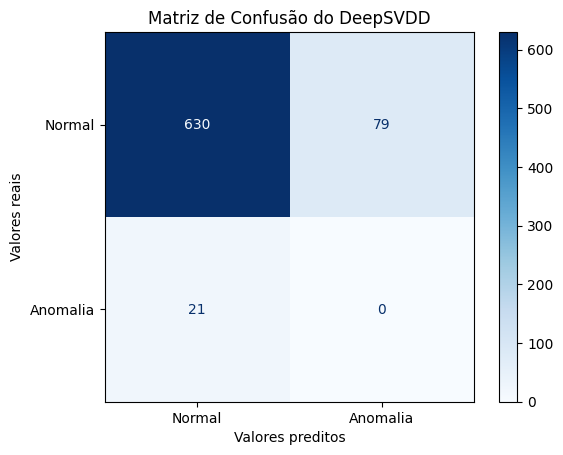

Acurácia=86,30
Precisão=0,00
Recall=0,00
F1=0,00
Falso Negativo=21
Falso Positivo=79
Verdadeiro Positivo=0


In [9]:
## class pyod.models.deep_svdd.DeepSVDD(c=None, use_ae=False, hidden_neurons=None, hidden_activation='relu', 
# output_activation='sigmoid', optimizer='adam', epochs=100, batch_size=32, dropout_rate=0.2, l2_regularizer=0.1, 
# validation_size=0.1, preprocessing=True, verbose=1, random_state=None, contamination=0.1)

from pyod.models.deep_svdd import DeepSVDD

clf = DeepSVDD()
clf_name='DeepSVDD'

parametros = {'contamination': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15],
             'preprocessing':[False],
             'verbose':[2],
             'random_state':[69]}

grid = GridSearchCV(estimator = clf,          
                param_grid = parametros,  
                scoring = 'recall',           
                cv = 10)  

grid_result = grid.fit(X_minmax, Y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

contamination=grid_result.best_params_['contamination']

funcao=clf_name+'(**grid.best_params_)'
clf = eval(funcao)
clf.fit(X_minmax)

avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

# DIF

In [10]:
#pip install torch


C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\bas

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true 

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\bas

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true 

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\bas

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true 

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\bas

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true 

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\s

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\bas

C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\rterr\.conda\envs\Mestrado310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true 

Best Score:  0.8
Best Params:  {'contamination': 0.05, 'n_estimators': 1, 'random_state': 69}
Avaliação do modelo DIF:
DIF ROC:0.9531, precision @ rank n:0.4762
Acurácia=95.8904109589041
Precisão=37.83783783783784
Recall=66.66666666666666
Falso Positivo=23
Falso Negativo=7
F1-score=48.275862068965516
ROC=0.9531197528376654


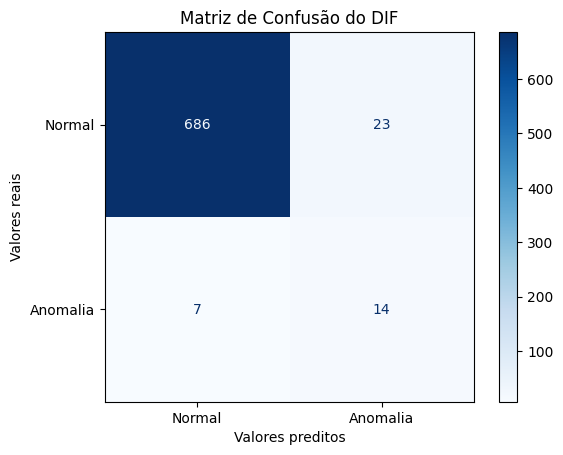

Acurácia=95,89
Precisão=37,84
Recall=66,67
F1=48,28
Falso Negativo=7
Falso Positivo=23
Verdadeiro Positivo=14


In [11]:
## class pyod.models.dif.DIF(batch_size=1000, representation_dim=20, hidden_neurons=None, hidden_activation='tanh', 
# skip_connection=False, n_ensemble=50, n_estimators=6, max_samples=256, contamination=0.1, random_state=None, device=None)

from pyod.models.dif import DIF

clf = DIF()
clf_name='DIF'

parametros = {'contamination': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15],
             'n_estimators':[1,2,3,4,5,6],
             'random_state':[69]}

grid = GridSearchCV(estimator = clf,          
                param_grid = parametros,  
                scoring = 'recall',           
                cv = 10)  

grid_result = grid.fit(X_minmax, Y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

contamination=grid_result.best_params_['contamination']

funcao=clf_name+'(**grid.best_params_)'
clf = eval(funcao)
clf.fit(X_minmax)

avalia(clf_name,Y,clf.decision_scores_,clf.labels_)
gera_matriz_de_confusao(Y,clf.labels_ ,clf_name)
grava_avaliacao(clf_name,Y,clf.decision_scores_,clf.labels_,round(contamination,2))

# Imprime a tabela final de avaliação

In [12]:
tabelafinal.sort_values("fn", axis = 0, ascending = True,
                 inplace = True, na_position ='last')
print(tabelafinal)

  algoritmo contaminacao acuracia precisao  recall     f1  fn  fp  tp
3     COPOD         0,12    90,82    23,86  100,00  38,53   0  67  21
1       COF         0,14    88,90    19,39   90,48  31,93   2  79  19
0     CBLOF         0,15    86,03    12,84   66,67  21,54   7  95  14
5       DIF         0,05    95,89    37,84   66,67  48,28   7  23  14
2        CD         0,05    95,89    35,48   52,38  42,31  10  20  11
4  DeepSVDD         0,11    86,30     0,00    0,00   0,00  21  79   0
